# Projecting Food Insecurity Rates in the US by County
## Exploratory Data Analysis
### Flatiron School Data Science Capstone<br>By Khyatee Desai
The ultimate goal of this capstone is to project 2020 FI rates, at the county level. This means that both **time** and **geography** are important components of understanding the data. This EDA notebook addresses 3 questions to help gain a better understanding of food insecurity, and how it relates to time and geography:<br>

**1. How have factors such as unemployment, houselessness, and food insecurity rates changed over time?**<br>
**2. Which geographic areas experience the highest rates of unemployment, houselessness, food insecurity rates, and racial segregation?**<br>
**3. Is there a relationship between food insecurity rate and other factors such as unemployment, houselessness, food availability, and race?**


In [1]:
import pandas as pd
import os
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import warnings
import pickle
warnings.filterwarnings('ignore')

### Import the cleaned dataset with engineered features

In [2]:
with open('../pickled/feature_engineered_data.pickle', "rb") as input_file:
    df = pickle.load(input_file) 
df.head(2)

,FIPS,Rent,Year,coc_number,Houseless_rate,Sheltered_rate,Unsheltered_rate,State,County,TOT_POP,TOT_MALE,TOT_FEMALE,TOT_WHITE,TOT_BLACK,TOT_NATIVE,TOT_ASIAN,TOT_PACIFIC,TOT_LATINX,State/County,FI Rate,Low Threshold Type,High Threshold Type,Cost Per Meal,Num_wholesale,Num_restaraunts,Num_grocery,Total_workforce,Employed,Unemployed,Unemployment_rate,Percent_male,Percent_female,Percent_white,Percent_Black,Percent_native,Percent_asian,Percent_pacific,Percent_latinX,Percent_working,Total_food_retail,Food_retail_per_person,Houseless_rate_X_Sheltered_rate,Rent_X_Percent_Black,Houseless_rate_X_Percent_male,Houseless_rate_X_Percent_female,Rent_X_Percent_working,Sheltered_rate_X_Percent_male,Sheltered_rate_X_Percent_female,Rent_X_Cost Per Meal,Rent_X_Percent_female,Rent_X_Percent_male,Rent_X_Unemployment_rate,Percent_asian_X_Percent_working,Unemployment_rate_X_Percent_Black,Unsheltered_rate_X_Percent_working,Unemployment_rate_X_Percent_white,Unemployment_rate_X_Percent_working,Cost Per Meal_X_Percent_working,Cost Per Meal_X_Percent_asian,Unsheltered_rate_X_Percent_asian,Rent_X_Percent_asian,Sheltered_rate_X_Percent_white,Percent_pacific_X_Percent_working,Percent_Black_X_Percent_working,Unsheltered_rate_X_Percent_male,Unsheltered_rate_X_Percent_female,Rent_X_Food_retail_per_person,Houseless_rate_X_Percent_Black,Cost Per Meal_X_Percent_male,Cost Per Meal_X_Percent_female,Sheltered_rate_X_Percent_Black,Houseless_rate_X_Unemployment_rate,Rent_X_Percent_white,Percent_Black_X_Percent_native,Unemployment_rate_X_Percent_male,Unemployment_rate_X_Percent_female,Unsheltered_rate_X_Cost Per Meal,Percent_Black_X_Percent_pacific,Percent_female_X_Percent_working,Percent_male_X_Percent_working,Cost Per Meal_X_Percent_Black,Percent_white_X_Percent_native,Percent_female_X_Percent_asian,Percent_male_X_Percent_asian,Percent_white_X_Percent_pacific,Sheltered_rate_X_Percent_pacific,Houseless_rate_X_Percent_pacific,Houseless_rate_X_Percent_working,Houseless_rate_X_Percent_asian,TOT_POP_X_Total_food_retail,Num_restaraunts_X_Num_grocery,log_Rent,log_Houseless_rate,log_Sheltered_rate,log_Unsheltered_rate,log_TOT_POP,log_Cost Per Meal,log_Num_wholesale,log_Num_restaraunts,log_Num_grocery,log_Unemployment_rate,log_Percent_male,log_Percent_female,log_Percent_white,log_Percent_Black,log_Percent_native,log_Percent_asian,log_Percent_pacific,log_Percent_working,log_Total_food_retail,log_Food_retail_per_person,Lo_thresh_SNAP,Lo_thresh_SNAP_other,Hi_thresh_SNAP,Hi_thresh_SNAP_other,Hi_thresh_other
0,01073,1019.995960,2014,AL-500,0.001396,0.000961,0.000435,Alabama,Jefferson County,659972.0,312491.0,347481.0,355635.0,284082.0,2029.0,10378.0,347.0,24099.0,"Jefferson County, AL",0.197,SNAP,Other Nutrition Program,2.93,483.0,2693.0,400.0,312131.0,292505.0,19626.0,6.3,0.473491,0.526509,0.538864,0.430446,0.003074,0.015725,0.000526,0.036515,0.472946,3576.0,0.005418,0.000001,439.052706,0.000661,0.000735,482.402827,0.000455,0.000506,2988.588162,537.036747,482.959213,6425.974545,0.007437,2.711807,0.000206,3.394842,2.979559,1.385731,0.046074,0.000007,16.039344,0.000518,0.000249,0.203577,0.000206,0.000229,5.526758,0.000601,1.387330,1.542670,0.000414,0.008793,549.638868,0.001323,2.982995,3.317005,0.001274,0.000226,0.249010,0.223936,1.261205,0.001657,0.008279,0.007446,0.000283,5.052135e-07,7.338020e-07,0.000660,0.000022,2.360060e+09,1077200.0,6.927554,-6.574399,-6.947657,-7.740715,13.399953,1.075002,6.180017,7.898411,5.991465,1.840550,-0.747622,-0.641487,-0.618292,-0.842934,-5.784654,-4.152509,-7.550628,-0.748774,8.18200,-5.217953,1,0,0,0,1
19,01117,1229.755051,2014,AL-500,0.001396,0.000961,0.000435,Alabama,Shelby County,206280.0,100304.0,105976.0,174094.0,24247.0,805.0,4403.0,101.0,11872.0,"Shelby County, AL",0.105,SNAP,Other Nutrition Program,3.37,1.0,743.0,2706.0,107208.0,102400.0,4808.0,4.5,0.486252,0.513748,0.843969,0.117544,0.003902,0.021345,0.000490,0.057553,0.519721,3450.0,0.016725,0.000001,144.550469,0.000679,0.000717,639.129239,0.000467,0.000494,4144.274520,631.784571,597.9704

# Inspect the Data
Look at descriptive statistics to get a general understanding of the distribution of each feature

In [33]:
df.describe()

,Rent,Houseless_rate,Sheltered_rate,Unsheltered_rate,TOT_POP,TOT_MALE,TOT_FEMALE,TOT_WHITE,TOT_BLACK,TOT_NATIVE,TOT_ASIAN,TOT_PACIFIC,TOT_LATINX,FI Rate,Cost Per Meal,Num_wholesale,Num_restaraunts,Num_grocery,Total_workforce,Employed,Unemployed,Unemployment_rate,Percent_male,Percent_female,Percent_white,Percent_Black,Percent_native,Percent_asian,Percent_pacific,Percent_latinX,Percent_working,Total_food_retail,Food_retail_per_person,Houseless_rate_X_Sheltered_rate,Rent_X_Percent_Black,Houseless_rate_X_Percent_male,Houseless_rate_X_Percent_female,Rent_X_Percent_working,Sheltered_rate_X_Percent_male,Sheltered_rate_X_Percent_female,Rent_X_Cost Per Meal,Rent_X_Percent_female,Rent_X_Percent_male,Rent_X_Unemployment_rate,Percent_asian_X_Percent_working,Unemployment_rate_X_Percent_Black,Unsheltered_rate_X_Percent_working,Unemployment_rate_X_Percent_white,Unemployment_rate_X_Percent_working,Cost Per Meal_X_Percent_working,Cost Per Meal_X_Percent_asian,Unsheltered_rate_X_Percent_asian,Rent_X_Percent_asian,Sheltered_rate_X_Percent_white,Percent_pacific_X_Percent_working,Percent_Black_X_Percent_working,Unsheltered_rate_X_Percent_male,Unsheltered_rate_X_Percent_female,Rent_X_Food_retail_per_person,Houseless_rate_X_Percent_Black,Cost Per Meal_X_Percent_male,Cost Per Meal_X_Percent_female,Sheltered_rate_X_Percent_Black,Houseless_rate_X_Unemployment_rate,Rent_X_Percent_white,Percent_Black_X_Percent_native,Unemployment_rate_X_Percent_male,Unemployment_rate_X_Percent_female,Unsheltered_rate_X_Cost Per Meal,Percent_Black_X_Percent_pacific,Percent_female_X_Percent_working,Percent_male_X_Percent_working,Cost Per Meal_X_Percent_Black,Percent_white_X_Percent_native,Percent_female_X_Percent_asian,Percent_male_X_Percent_asian,Percent_white_X_Percent_pacific,Sheltered_rate_X_Percent_pacific,Houseless_rate_X_Percent_pacific,Houseless_rate_X_Percent_working,Houseless_rate_X_Percent_asian,TOT_POP_X_Total_food_retail,Num_restaraunts_X_Num_grocery,log_Rent,log_Houseless_rate,log_Sheltered_rate,log_Unsheltered_rate,log_TOT_POP,log_Cost Per Meal,log_Num_wholesale,log_Num_restaraunts,log_Num_grocery,log_Unemployment_rate,log_Percent_male,log_Percent_female,log_Percent_white,log_Percent_Black,log_Percent_native,log_Percent_asian,log_Percent_pacific,log_Percent_working,log_Total_food_retail,log_Food_retail_per_person,Lo_thresh_SNAP,Lo_thresh_SNAP_other,Hi_thresh_SNAP,Hi_thresh_SNAP_other,Hi_thresh_other
count,6645.000000,47487.000000,47487.000000,47487.000000,4.805700e+04,4.805700e+04,4.805700e+04,4.805700e+04,4.805700e+04,48057.000000,4.805700e+04,48057.000000,4.805700e+04,38370.000000,38342.000000,21399.000000,21399.000000,21399.000000,8.477800e+04,8.477800e+04,84778.000000,84778.000000,48057.000000,48057.000000,48057.000000,48057.000000,48057.000000,48057.000000,48057.000000,48057.000000,48045.000000,21399.000000,19657.000000,4.748700e+04,3213.000000,47487.000000,47487.000000,3213.000000,47487.000000,47487.000000,1785.000000,3213.000000,3213.000000,6645.000000,48045.000000,48045.000000,47487.000000,48045.000000,48045.000000,35215.000000,35226.000000,4.748700e+04,3213.000000,47487.000000,48045.000000,48045.000000,47487.000000,47487.000000,1240.000000,47487.000000,35226.000000,35226.000000,47487.000000,47487.000000,3213.000000,48057.000000,48045.000000,48045.000000,34821.000000,48057.000000,48045.000000,48045.000000,35226.000000,48057.000000,48057.000000,48057.000000,48057.000000,4.748700e+04,4.748700e+04,47487.000000,47487.000000,1.965700e+04,2.139900e+04,6645.000000,47487.000000,47487.000000,47487.000000,48057.000000,38342.000000,21399.000000,21399.000000,21399.000000,84778.000000,48057.000000,48057.000000,48057.000000,48057.000000,48057.000000,48057.000000,48057.000000,48045.000000,21399.000000,19657.000000,85037.000000,85037.000000,85037.000000,85037.000000,85037.000000
mean,1609.911352,0.001072,0.000669,0.000403,1.243185e+05,6.114445e+04,6.317403e+04,9.483544e+04,1.662157e+04,1527.897226,7.884455e+03,287.311880,2.510092e+04,0.147296,2.765260,135.826768,598

From the statistics above, we see that most features, such as Rent, Unemployment_rate, and Total_food_retail contain large upper outliers. 
## Visualize Outliers

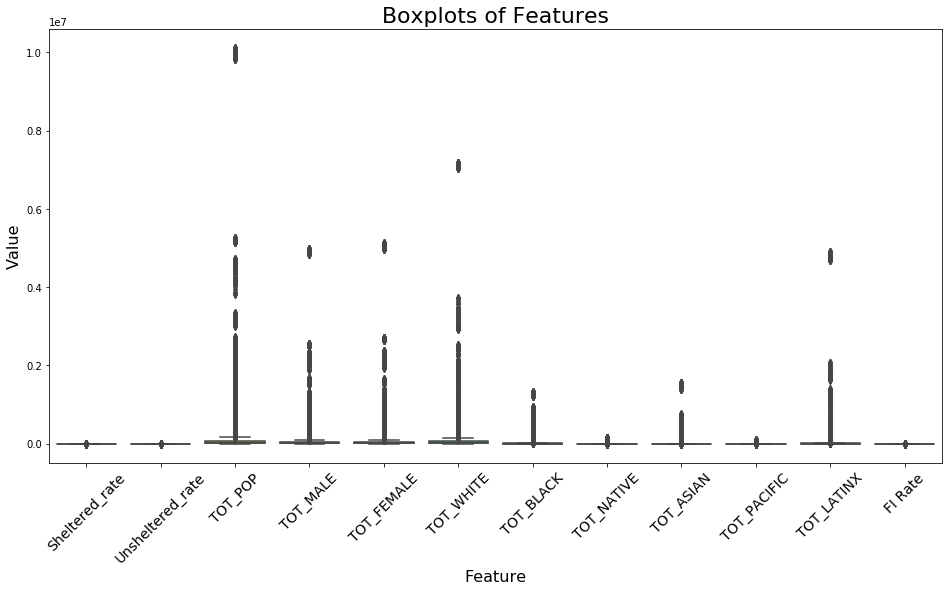

In [36]:
# create boxplot for each feature with larger outliers
plt.figure(figsize=(16, 8));
sns.boxplot(data= df.iloc[:,5:22]);
plt.title('Features with Significant Outliers', fontdict={'fontsize':22});
plt.ylabel('Value', fontdict={'fontsize':16});
plt.xlabel('Feature', fontdict={'fontsize':16});
plt.xticks(rotation=45,fontsize=14);

The above boxplots illustrate that TOT_POP, TOT_MALE, TOT_FEMALE, TOT_WHITE, TOT_BLACK, TOT_ASIAN, AND TOT_LATINX in particular have very large outliers that will likely need to be reduced during the modeling process to improve model generalizability.
## Multicollinearity
Inspect multicollinearity using a heatmap to determine which features are highly correlated and can potentially be removed during the modeling process

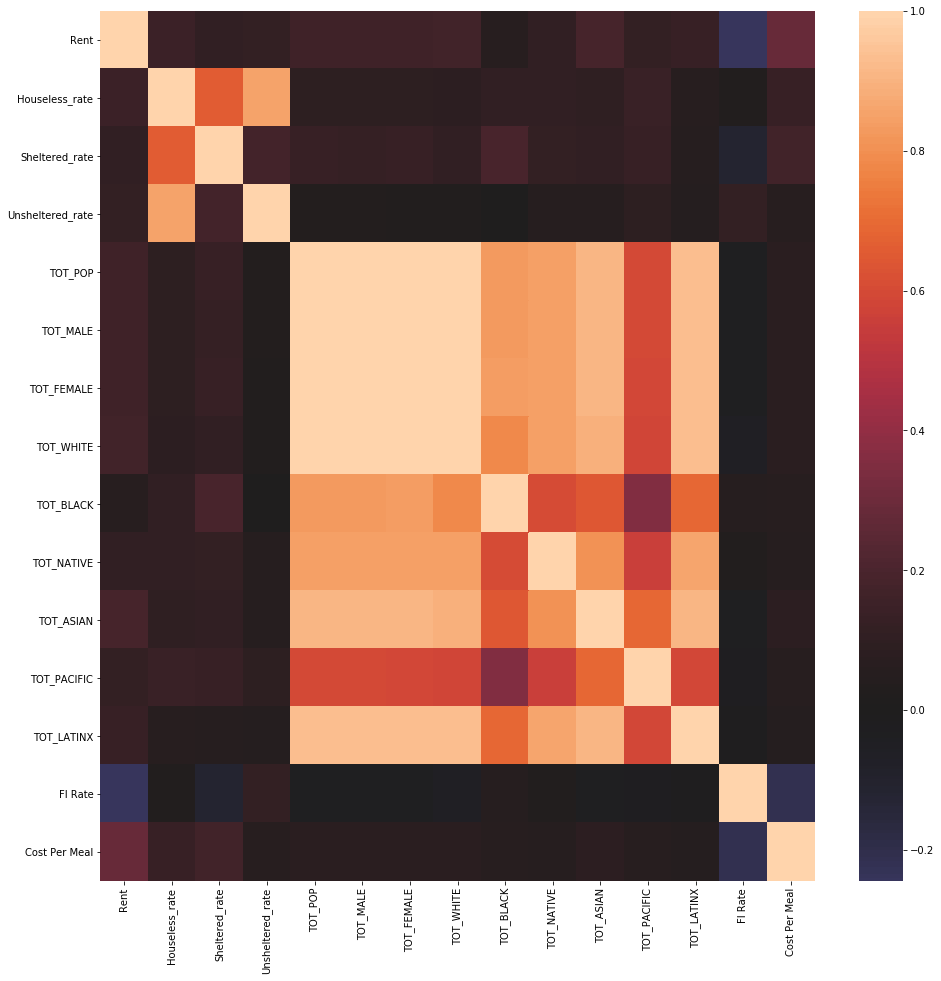

In [6]:
# generate a heatmap of correlation matrix for original dataset features 
plt.figure(figsize=(16, 16));
sns.heatmap(df.iloc[:,:23].corr(), center=0);

The above heatmap indicates that is very high correlation between all pairs of demographic features, such as TOT_NATIVE and TOT_ASIAN. This makes sense, given that a place with a higher overall population likely contains a higher presence of all demographics, than a place with a low total population.<br>

There is also high collinearity between houseless_rate, sheltered_rate, and unsheltered_rate, which makes sense as they are all directly related to one another.<br>

Highly correlated features may be removed during the modeling process based on model performance and interpretability.

# Question 1: How have features changed over time?
The first EDA question explores how different features from the original dataset have changed over time. Because this project ultimately aims to project food insecurity rates for 2020, it is important to get an understanding of how features change over time, and whether they follow any discernable trends.<br>

Each feature group is scaled to the same magnitude, and visualized using lineplots or/and barcharts. The productions of these charts with multiple variables is accomplished using two functions: `lineplot()` and `barchart()`, both of which can be found in the src folder of this repository.

## Food Insecurity, Houselessness, and Unemployment Rates, by Year
The charts below aim to visualize and compare the trends between these three features over time:

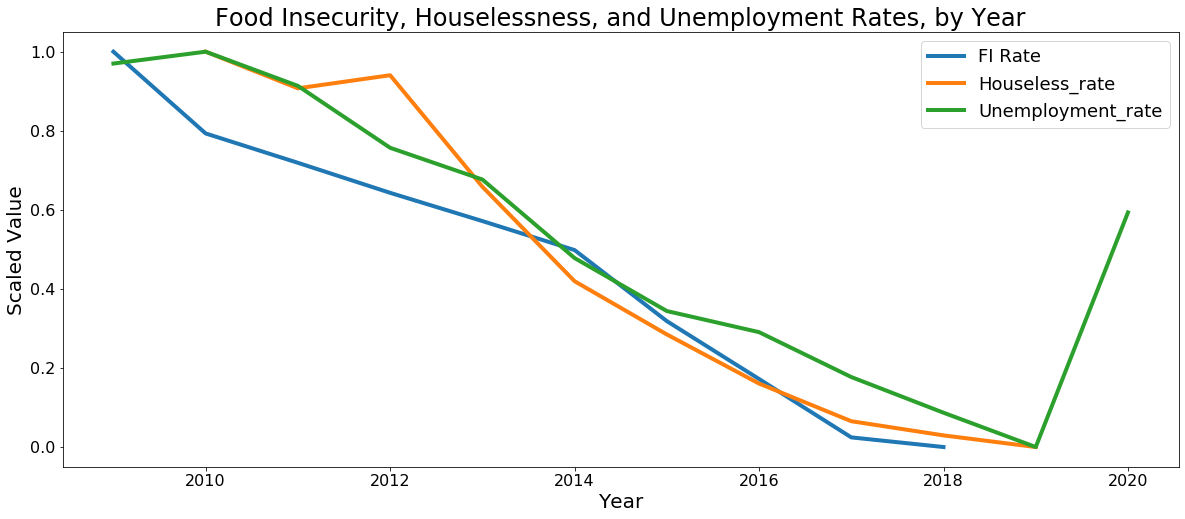

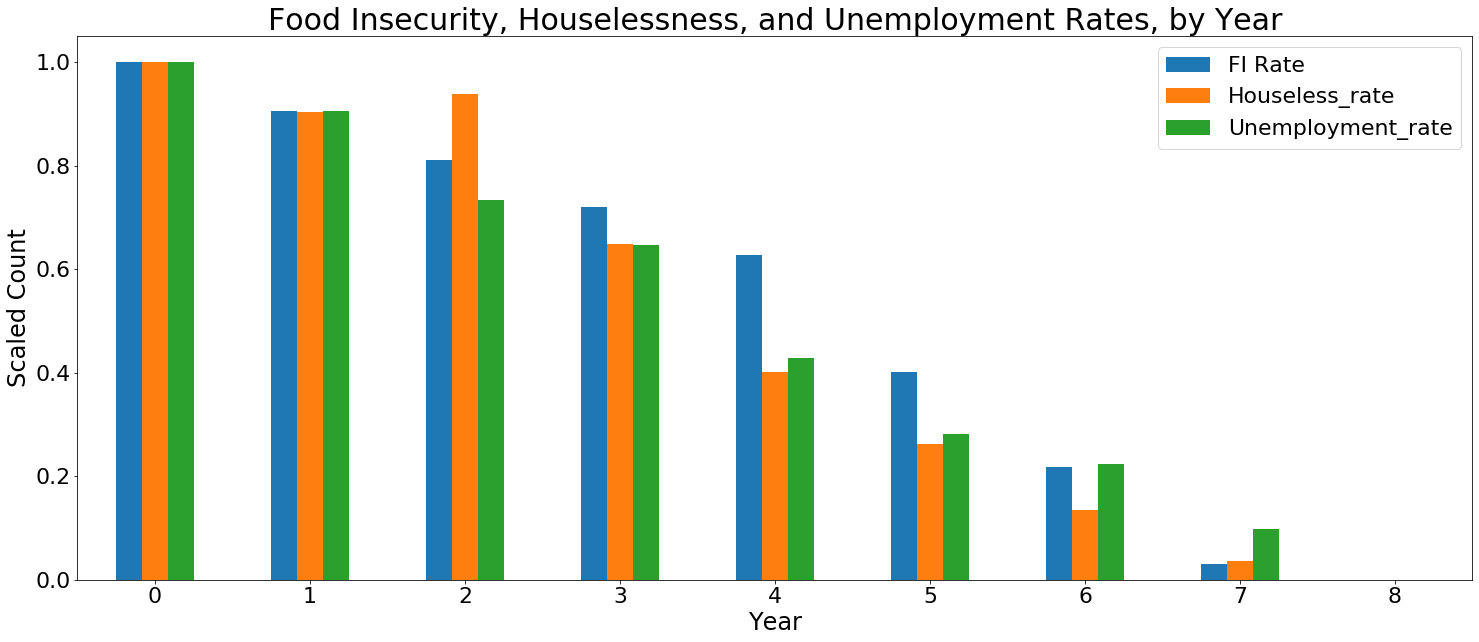

In [189]:
lineplot(df, ['FI Rate','Houseless_rate','Unemployment_rate'], title='Food Insecurity, Houselessness, and Unemployment Rates, by Year')
barchart(df, ['FI Rate','Houseless_rate','Unemployment_rate'], title='Food Insecurity, Houselessness, and Unemployment Rates, by Year')


The lineplot and barcharts above indicate there is a visible correlation between FI rate (target variable,) unemployment, and houseless rates. This is important to keep in mind, moving into modeling and inspecting feature importance.
## Food Retail by Year
This chart aims to visualize and compare the trends of number of grocery stores, restaraunts, and wholesalers by year.

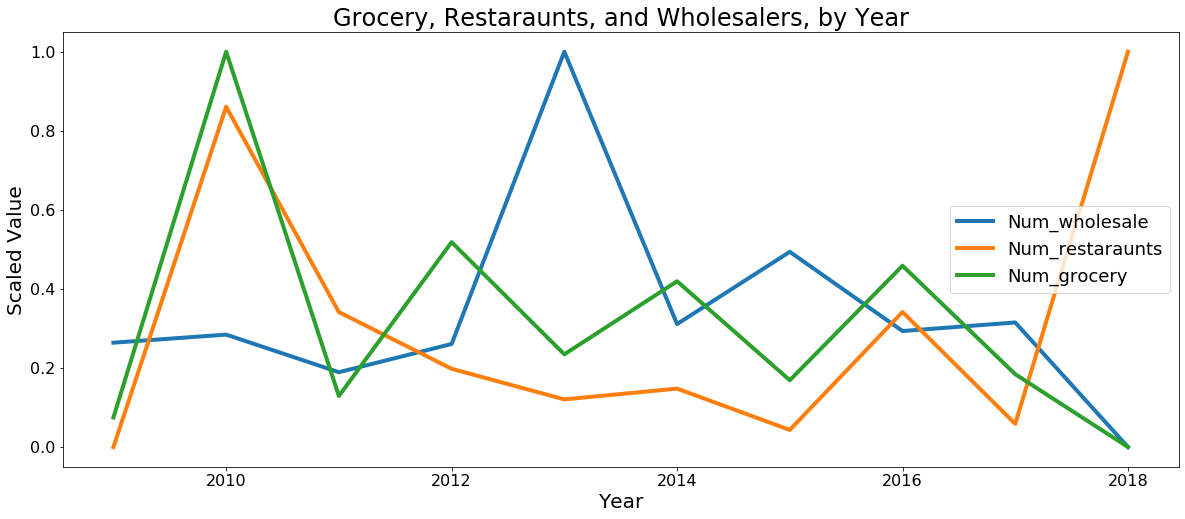

In [42]:
features = ['Num_wholesale','Num_restaraunts', 'Num_grocery']
lineplot(df, features ,title='Grocery, Restaraunts, and Wholesalers, by Year')

Overall there is surprisingly not a significant trend in the linecharts above on number of food retail businesses, however it is noteable that the year 2018 shows a sharp increase in the average number of restaraunts, and a decrease in the number of wholesalers and grocery stores. Generally buying food from restaraunts is more expensive per meal, than buying food from a grocery store, which could indicate that more people were getting food from restaraunts in 2018.
## Rent and Meal Cost, by Year
These charts aim to visualize and compare how rent prices and food costs have changed by year. 

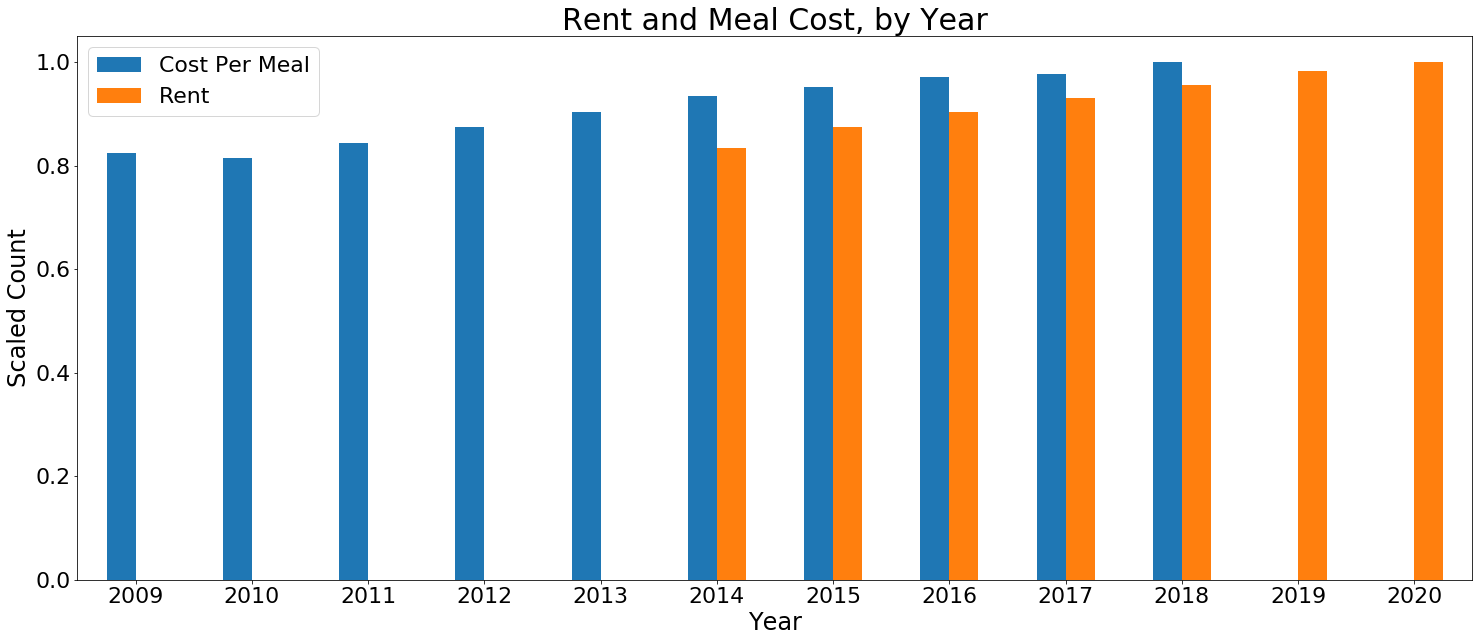

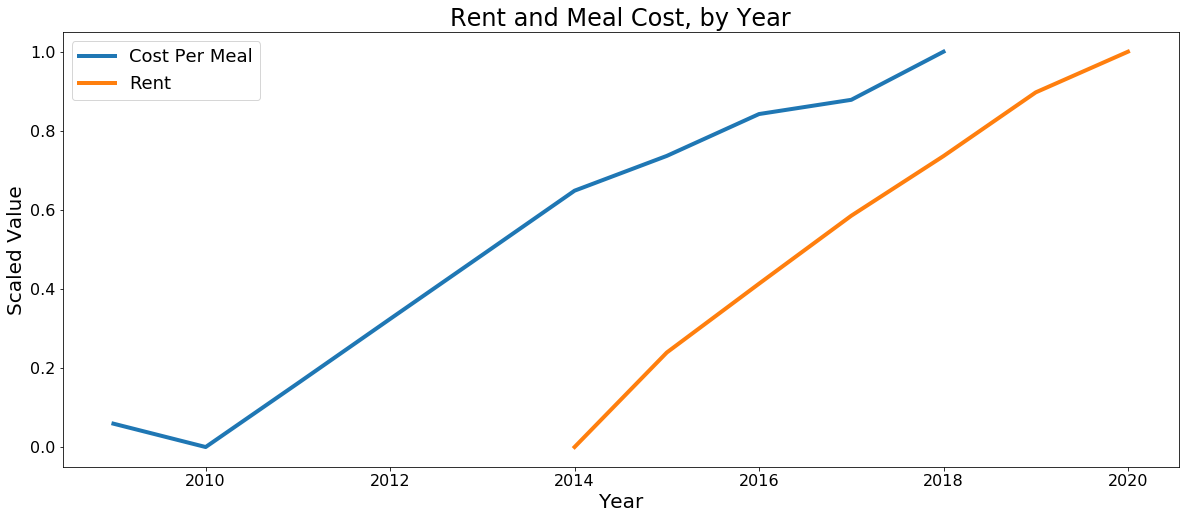

In [51]:
barchart(df, ['Cost Per Meal','Rent'], title='Rent and Meal Cost, by Year')
lineplot(df, ['Cost Per Meal','Rent'],title='Rent and Meal Cost, by Year')


### Food Insecurity in different communities, by Year

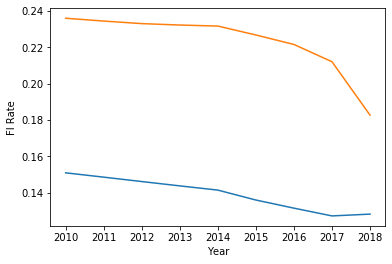

In [117]:
wyt = df[['FI Rate','Year']][df['Percent_white']>.5].groupby('Year').mean()
poc = df[['FI Rate','Year']][df['Percent_white']<.5].groupby('Year').mean()
sns.lineplot(x= wyt.index, y= wyt['FI Rate']);
sns.lineplot(x= poc.index, y= poc['FI Rate']);

In [38]:
def lineplot(df, features, title=None):

    plt.figure(figsize=(20, 8));

    for feat in features:
        x = df.groupby("Year")[feat].mean().reset_index().dropna()
        y = (x[feat] - min(x[feat])) / (max(x[feat]) - min(x[feat]))
        ax= sns.lineplot(x=x['Year'].astype(int), y= y, label=feat, linewidth = 4)
    ax.set_title(title, fontsize=24);
    ax.set_ylabel('Scaled Value', fontsize=20);
    ax.set_xlabel('Year', fontsize=20);
    ax.legend(prop=dict(size=18));
    plt.xticks(fontsize=16);
    plt.yticks(fontsize=16);


In [47]:
def barchart(df, features, title=None):
    '''input 1: dataframe
       input 2: one or more features to be plotted (list)
       input 3: (optional) title for chart'''
    
    plot_df = df.groupby("Year")[features].mean().fillna(0)
    for feat in features:
        plot_df[feat] =(plot_df[feat] - min(plot_df[feat])) / (max(plot_df[feat]) - min(plot_df[feat]))
    
    plot_df.plot(by='Year',kind='bar',fontsize=16,rot='horizontal',figsize=(25,10));
    plt.xlabel('Year', fontdict={'fontsize':24});
    plt.ylabel('Scaled Count', fontdict={'fontsize':24});
    plt.xticks(fontsize=22);
    plt.yticks(fontsize=22);
    plt.legend(prop=dict(size=22));
    plt.title(title, fontdict={'fontsize':30});

# Question 2: Which geographic areas have the highest rates of unemployment, houselessness, food insecurity?
The purpose of exploring this question is to gain a better understanding of the geographic component of food insecurity and related features.

## Heatmap
Create a heatmap to get a quick visualization of food insecurity rates in 5 random counties

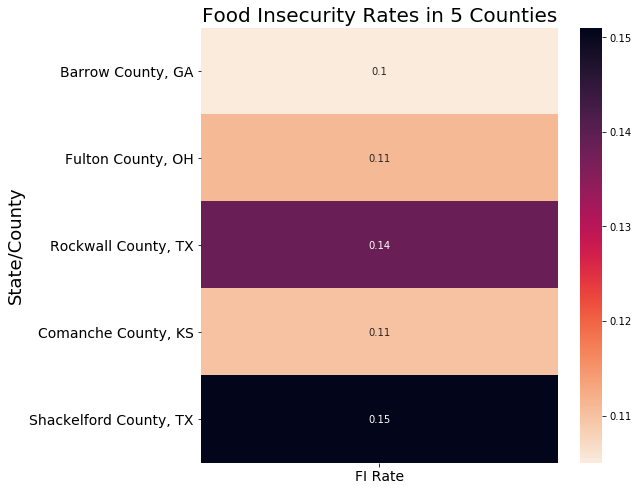

In [94]:
# Create dataframe of 5 random cities
a = df.set_index('State/County')[['FI Rate']].dropna().sample(5)

# make heatmap with most variant features
plt.figure(figsize=(8, 8));
plt.title('Food Insecurity Rates in 5 Counties', fontsize=20);
ax.set_ylim(-20, 20);
plt.xlabel('FI Rate', fontdict={'fontsize':18});
plt.ylabel('County', fontdict={'fontsize':18});
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
sns.heatmap(a, annot=True, cmap='rocket_r');


The above heatmap indicates that different geographies have significant differences in food insecurity rates.

## Choropleth Maps
The following cells generate chroropleth maps, which are heatmaps that visualize a particular feature across a geographic area. The maps are generated using a function called `choropleth()` which takes a dataframe, feature, year, color palette, and title, and generates a choropleth map.
### Unsheltered Rate by County, 2010 and 2019

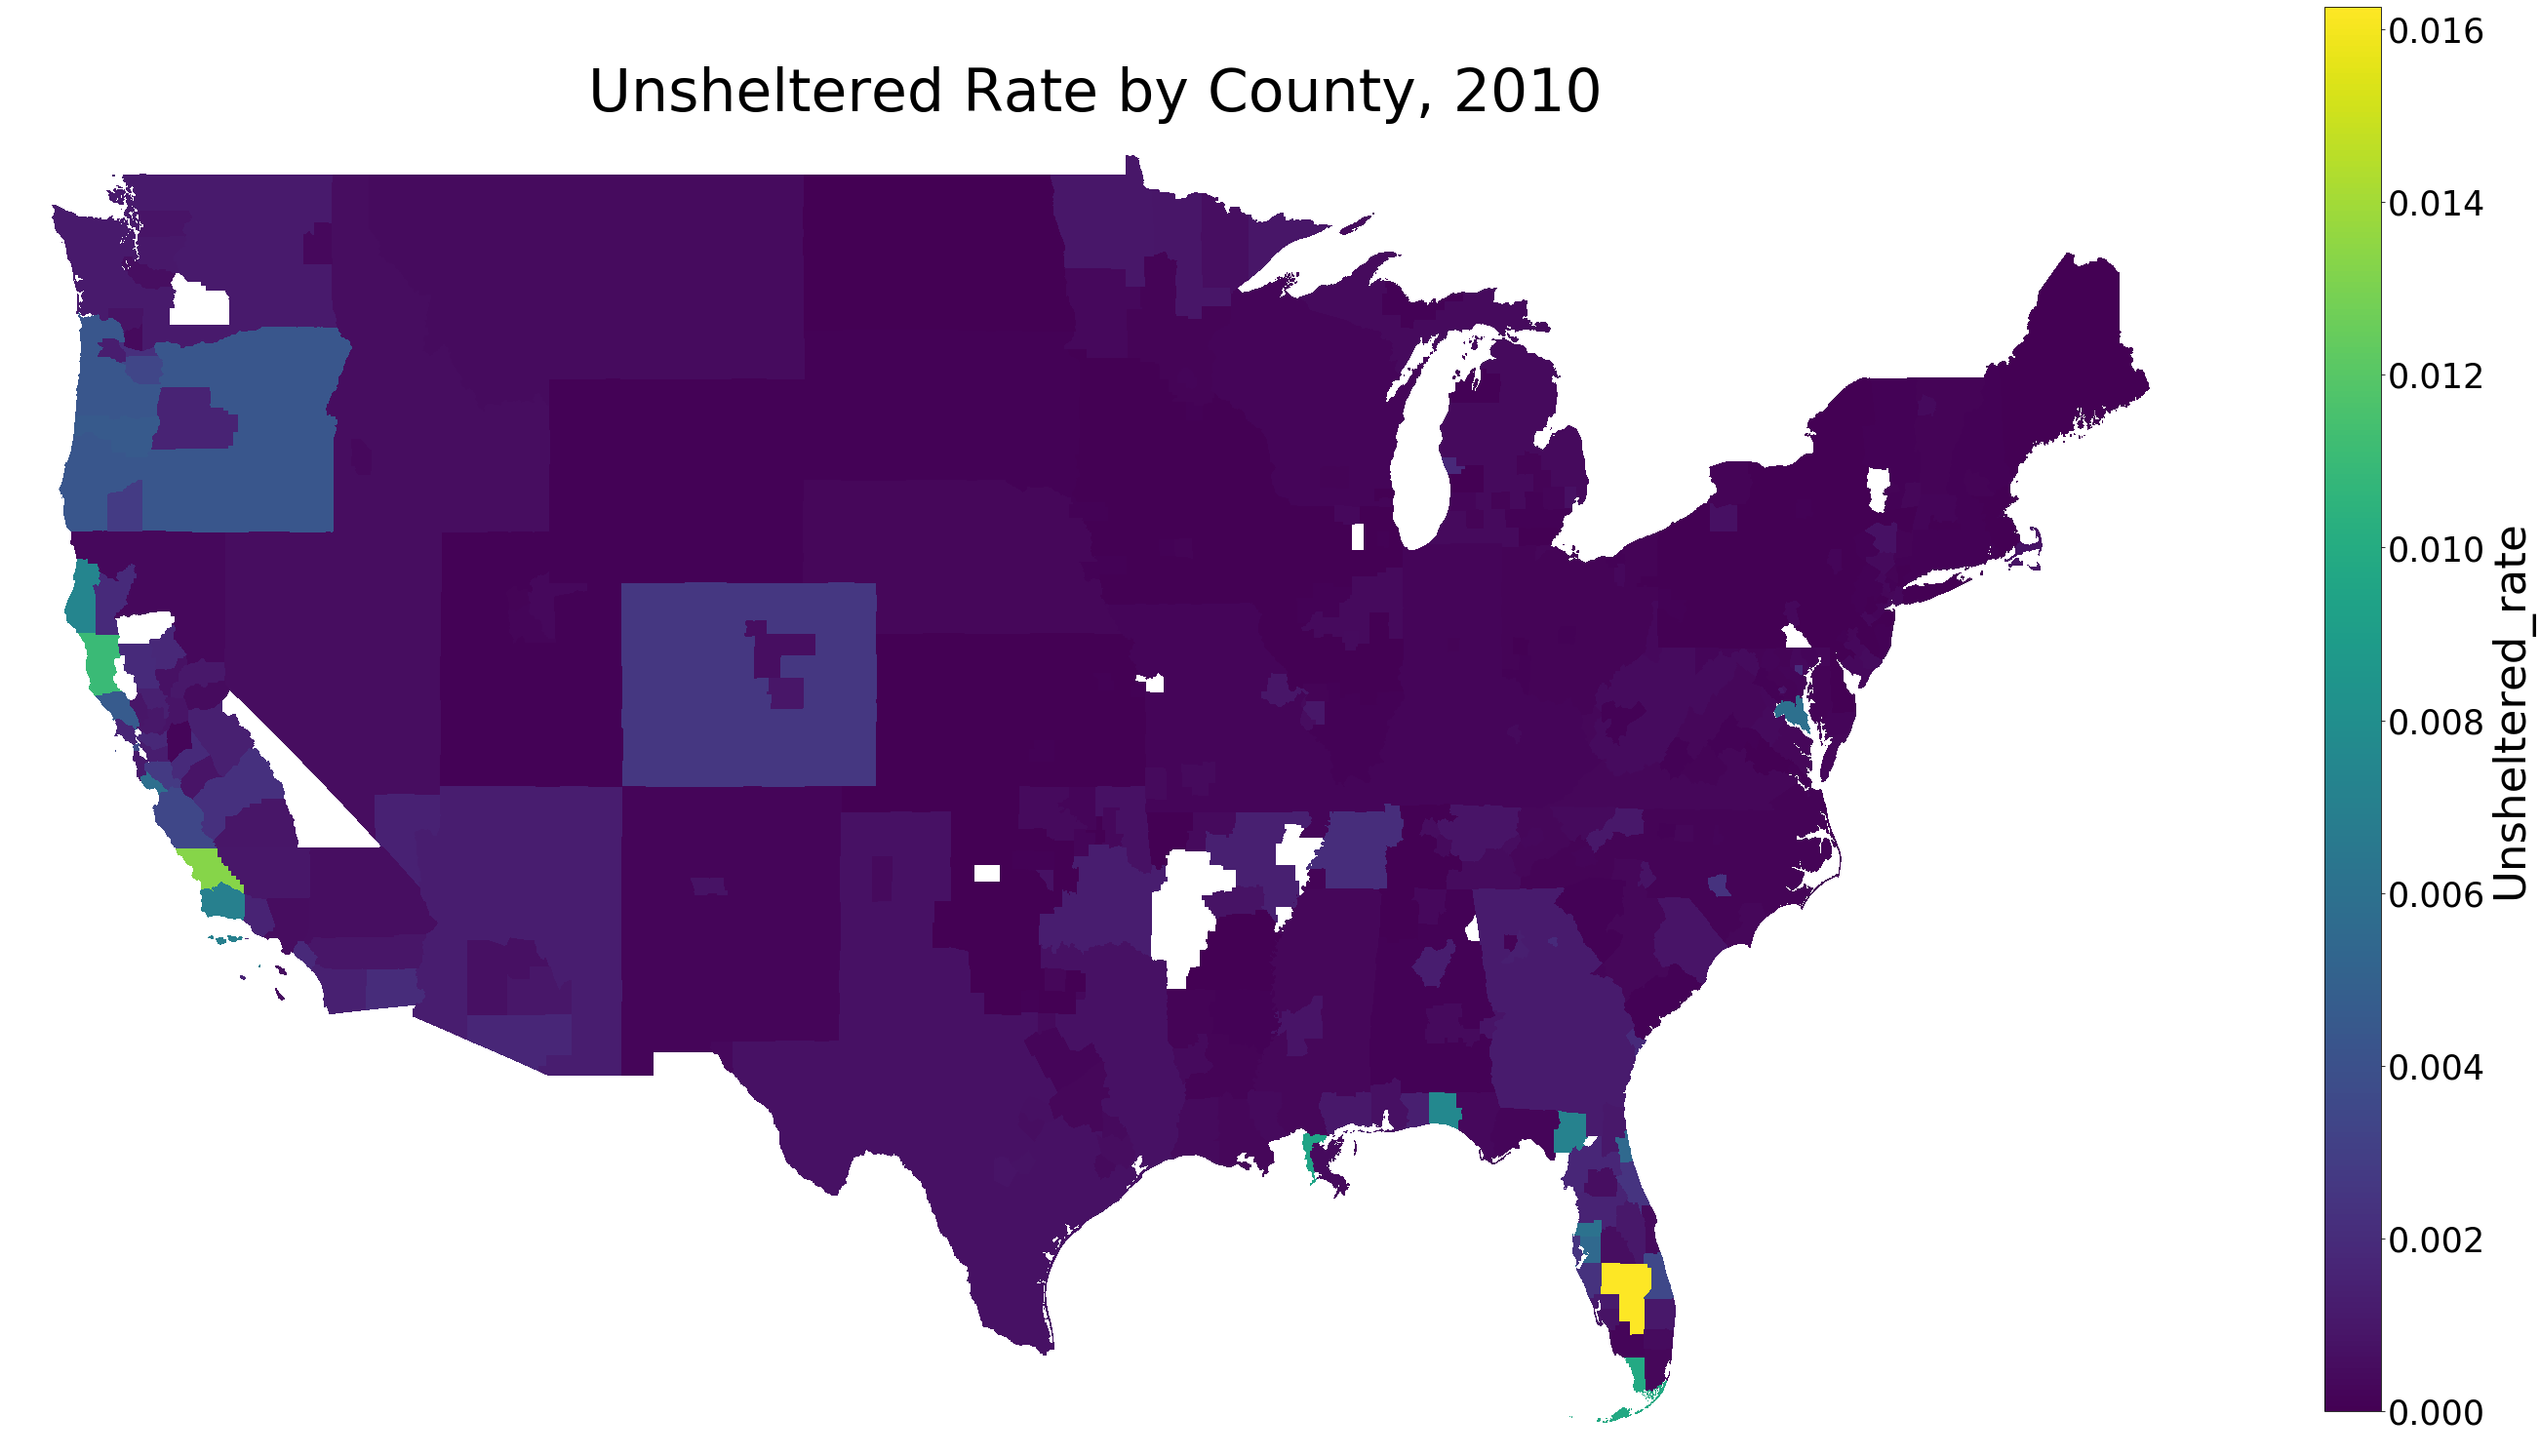

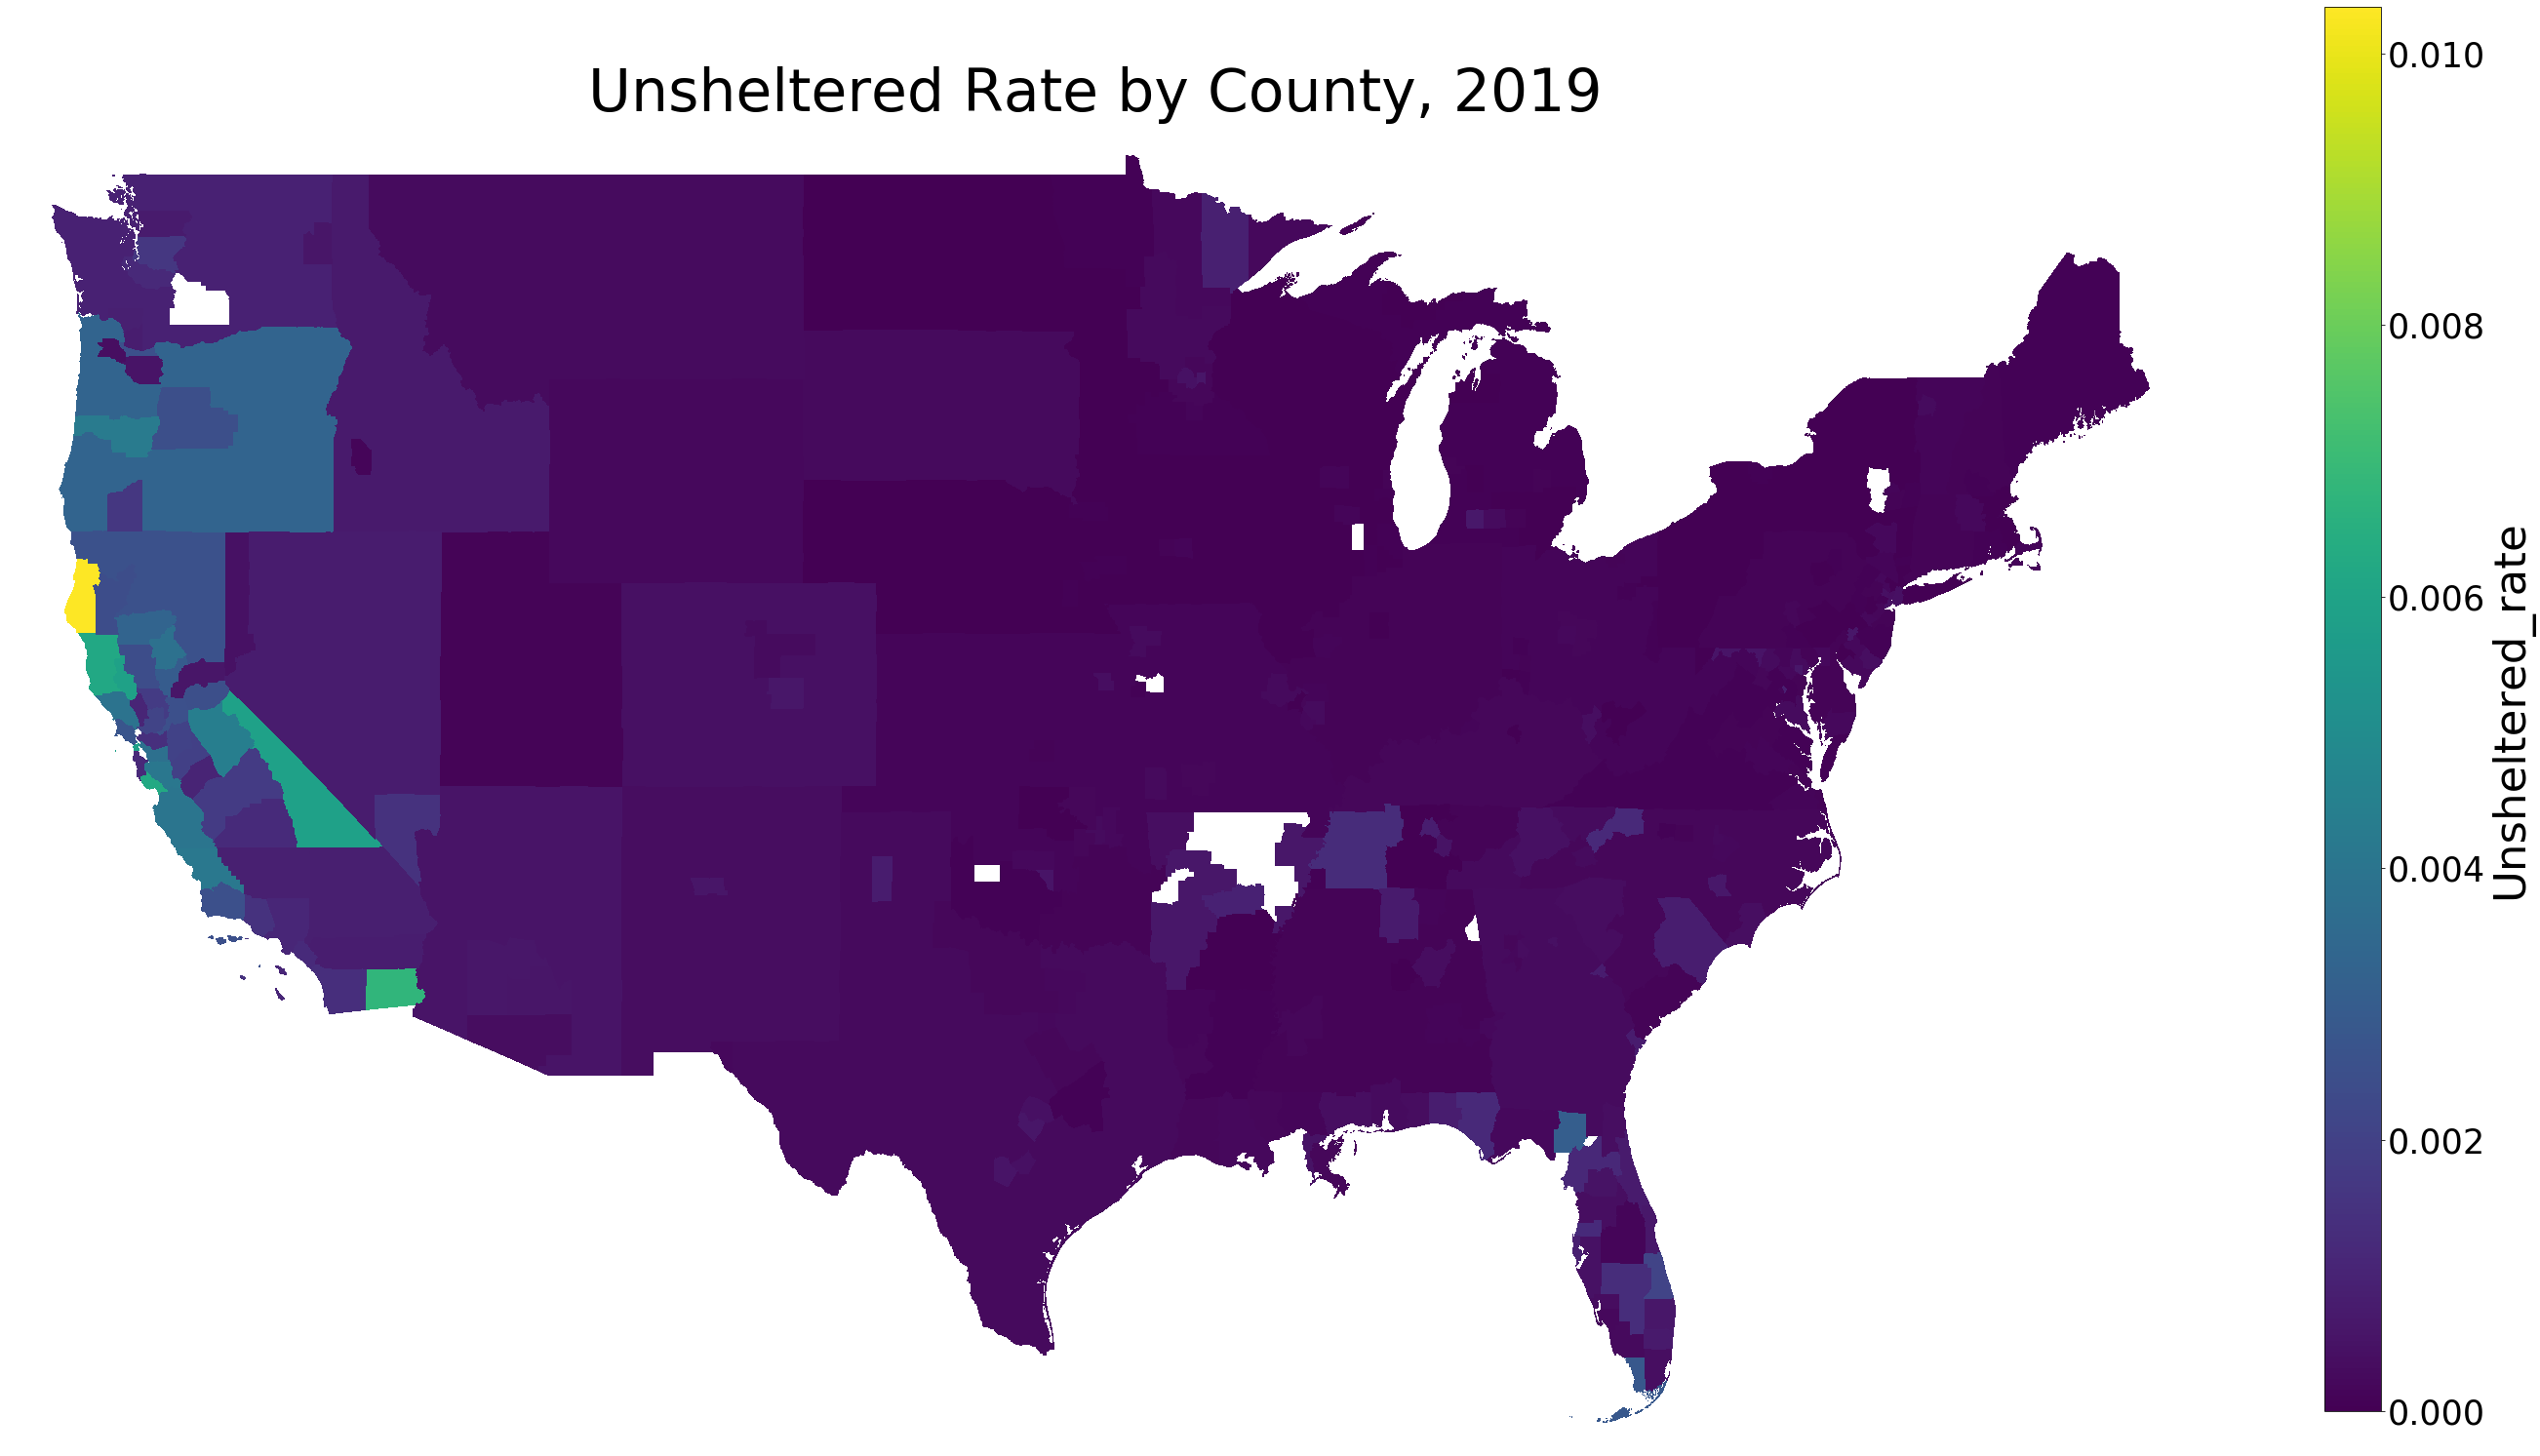

In [99]:
choropleth(df, 'Unsheltered_rate', '2010', "viridis", 'Unsheltered Rate')
choropleth(df, 'Unsheltered_rate', '2019', 'viridis', 'Unsheltered Rate')

The above maps visualize unsheltered rates, which represent the proportion of a population that is both houseless and unsheltered. The maps indicate that unsheltered rates have decreased in areas through the middle and South of the country, such as some counties in Florida, yet they have *drastically* increased across the West Coast, especially in California.
### Unemployment Rate, by County, 2019 and 2020

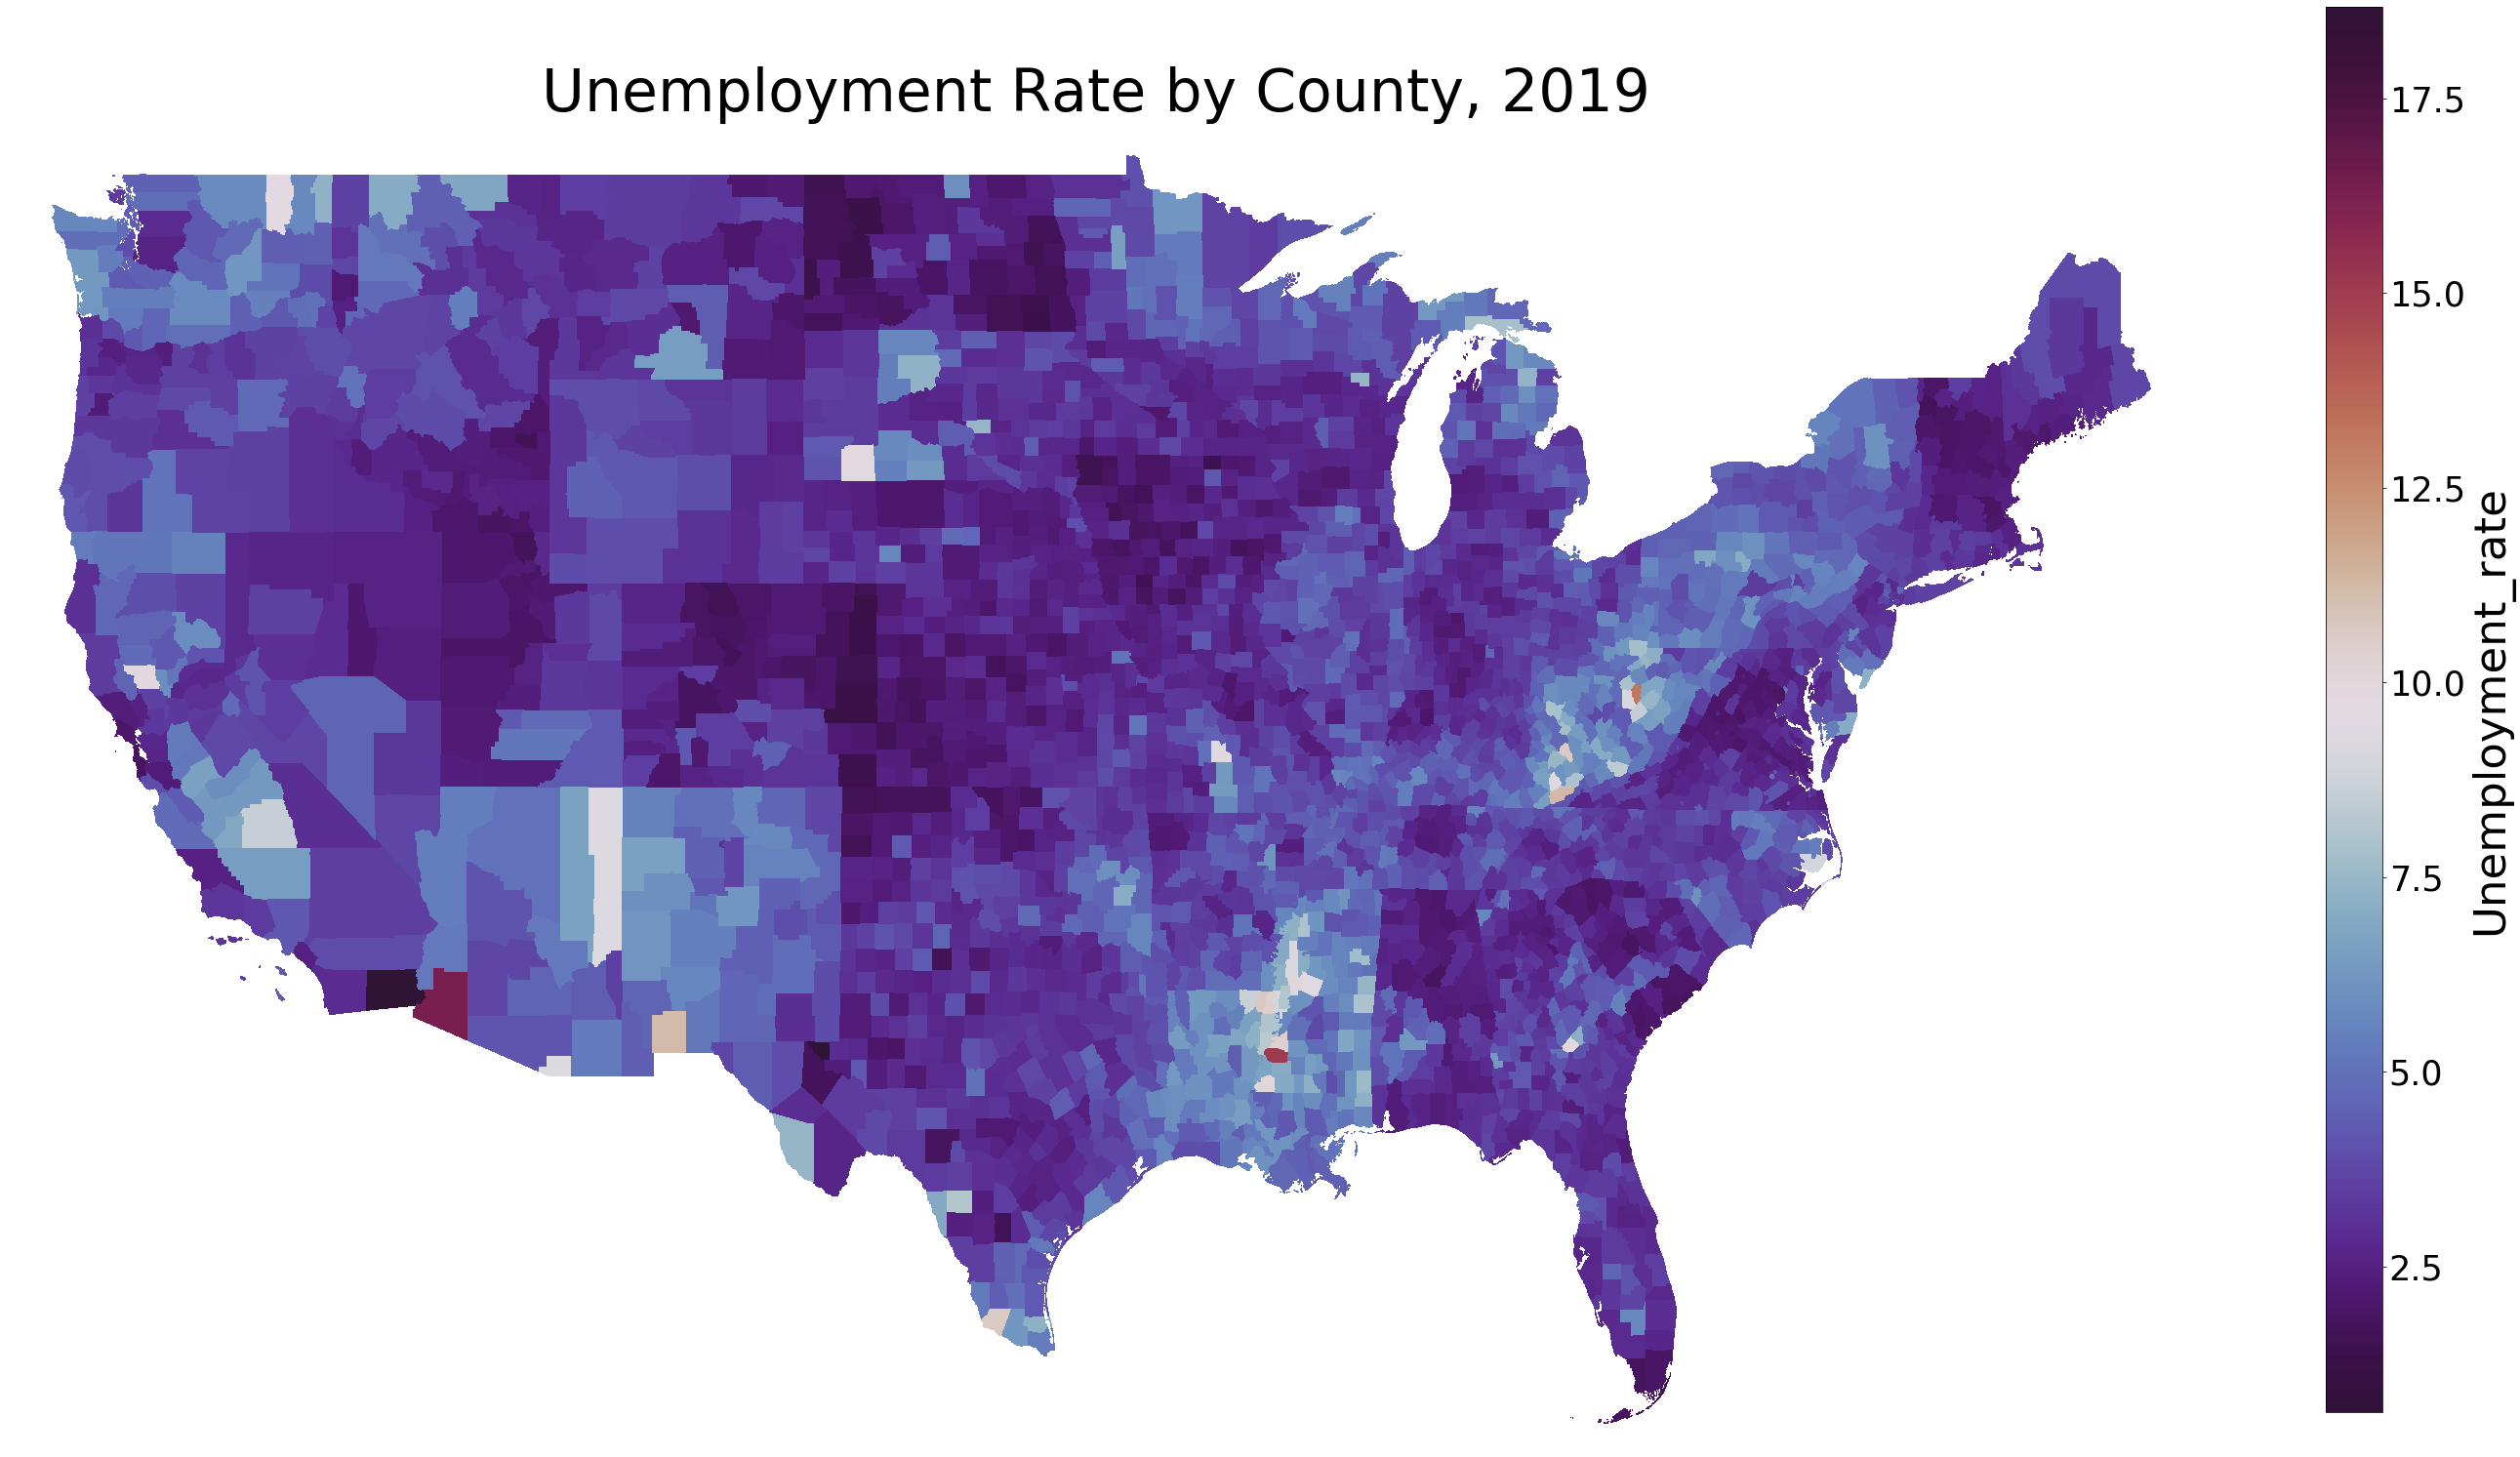

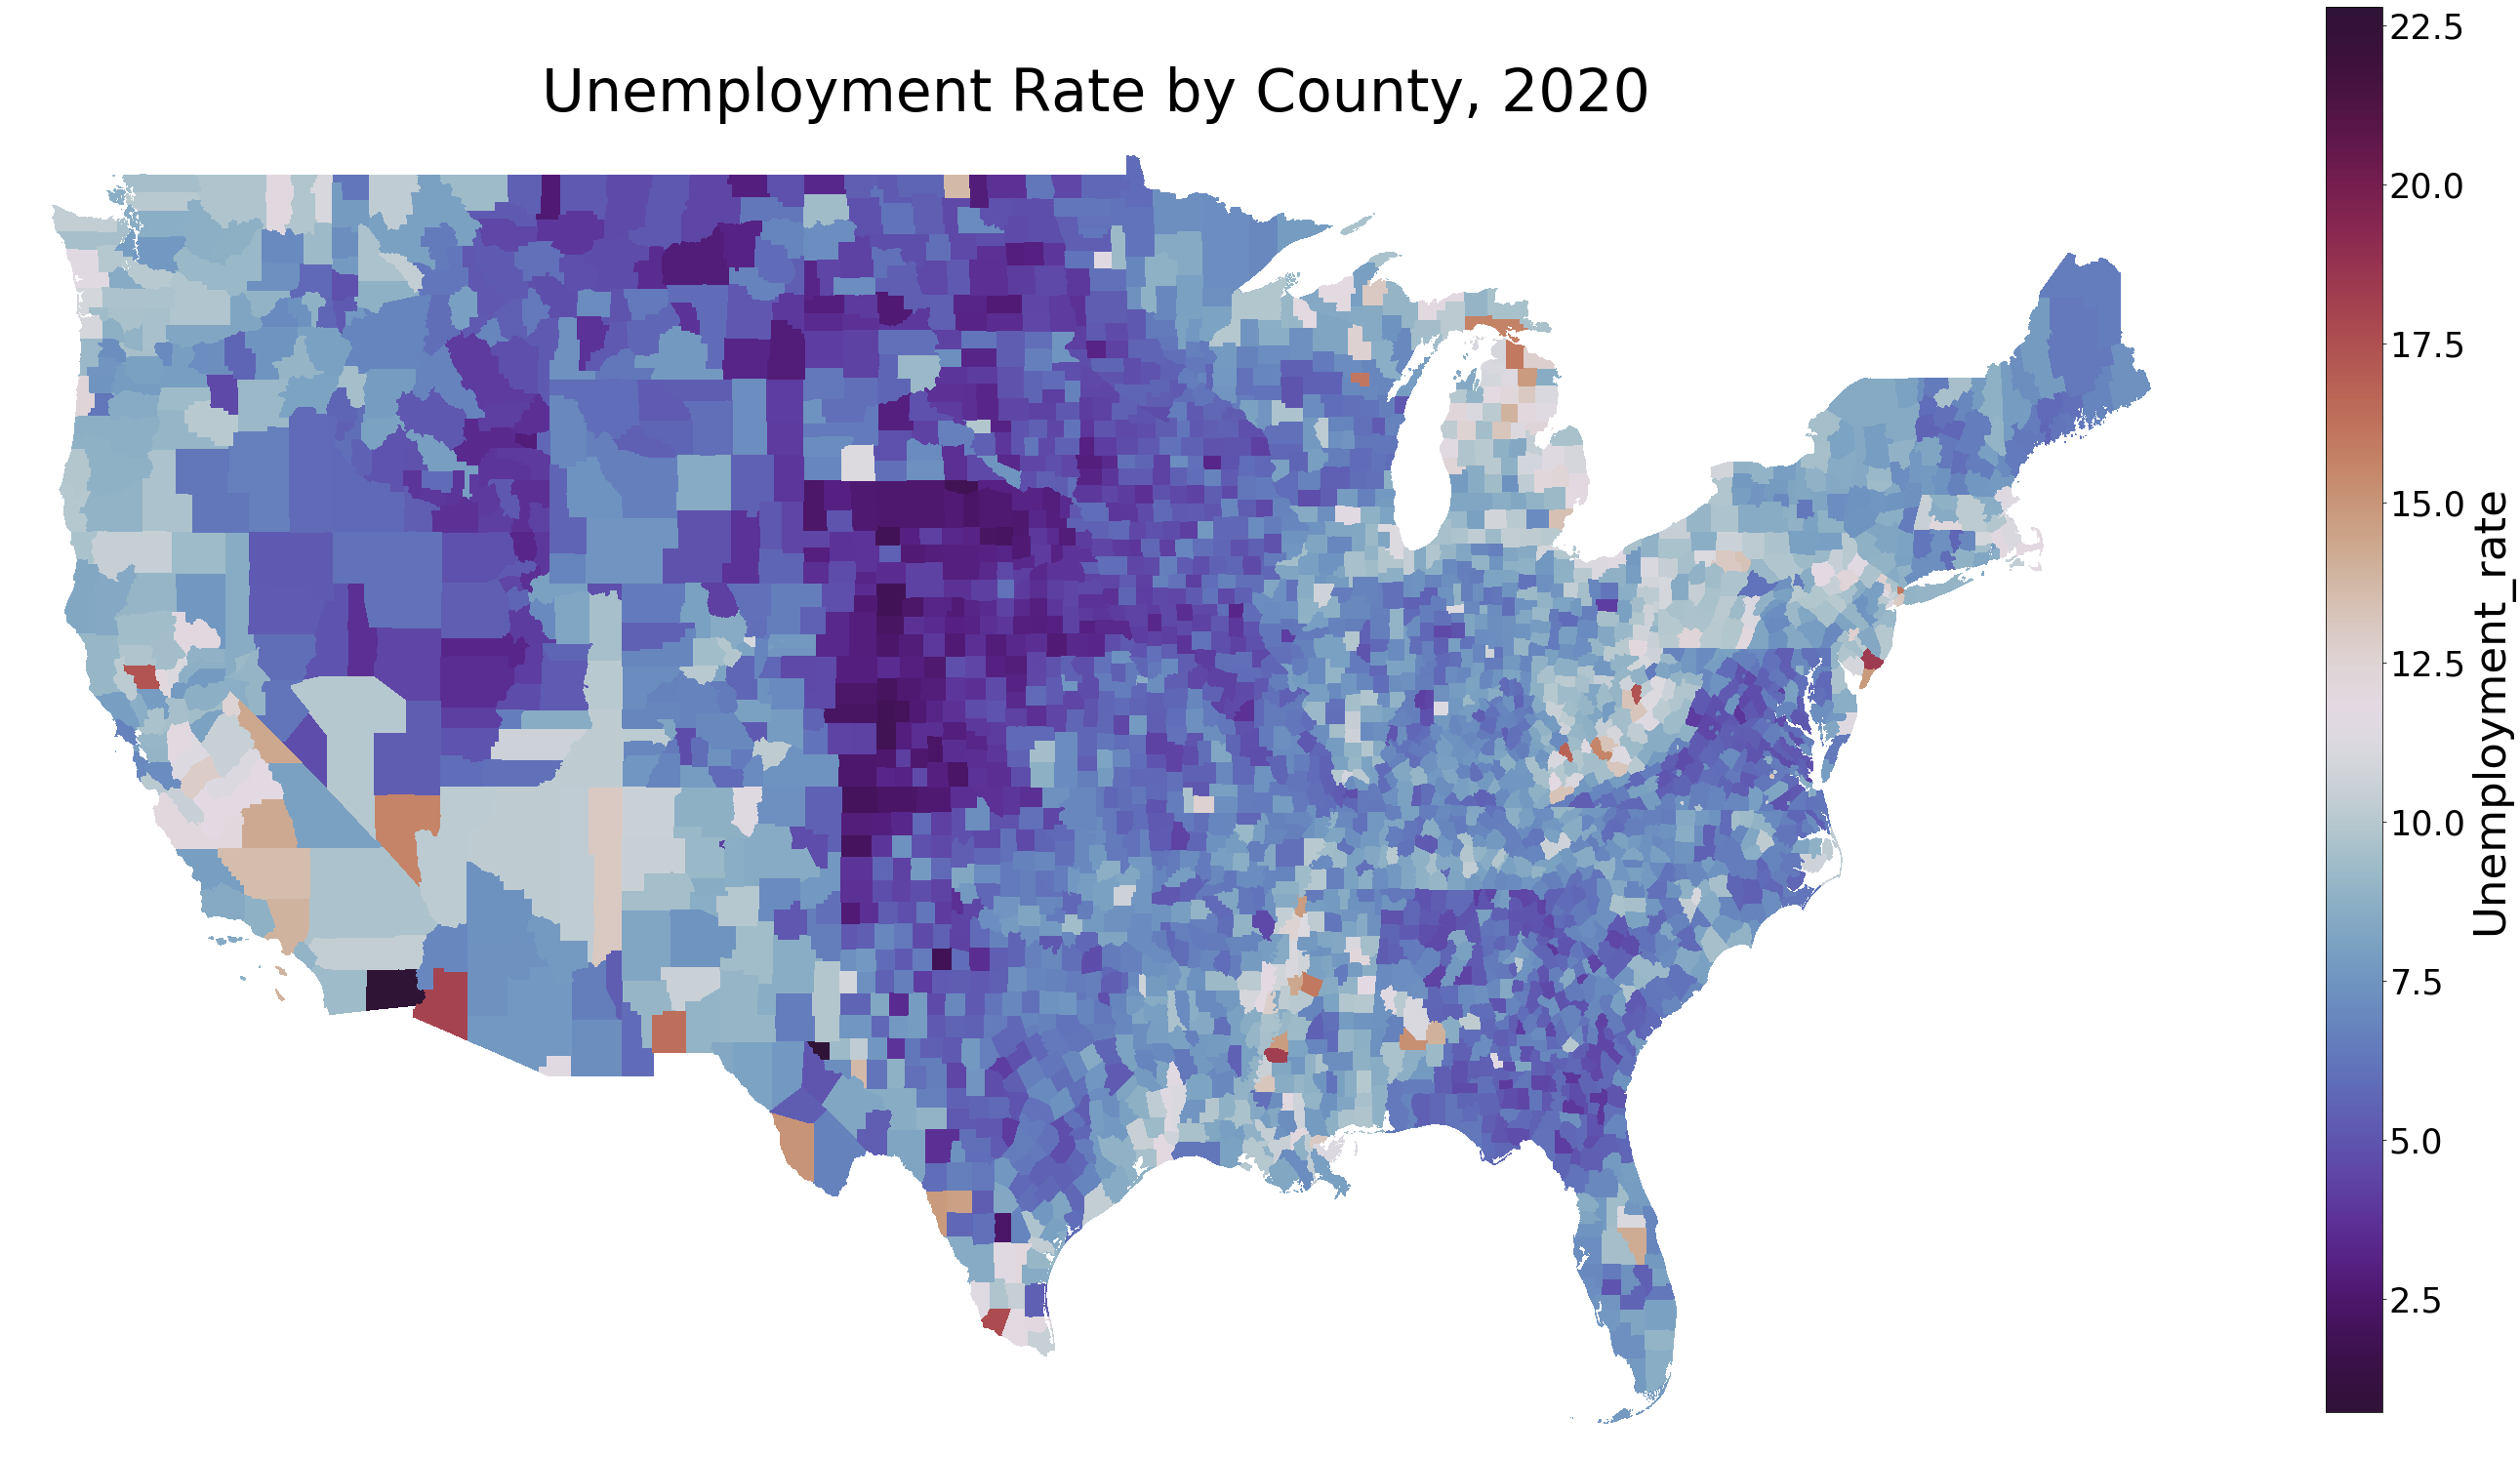

In [100]:
choropleth(df, 'Unemployment_rate', '2019', 'twilight_shifted', title='Unemployment Rate')
choropleth(df, 'Unemployment_rate', '2020', 'twilight_shifted',title='Unemployment Rate')

Unemployment rates were at low in 2019 before the pandemic started, and shot up significantly in 2020, as can be seen by the maps above, which show a large increase in unemployment rates across the country, and especially on the coasts.
### White Population Percentage by County, 2010 and 2018
These maps aim to visualize which areas of the country have predominently White populations, and which areas have a higher percentage of people of color.

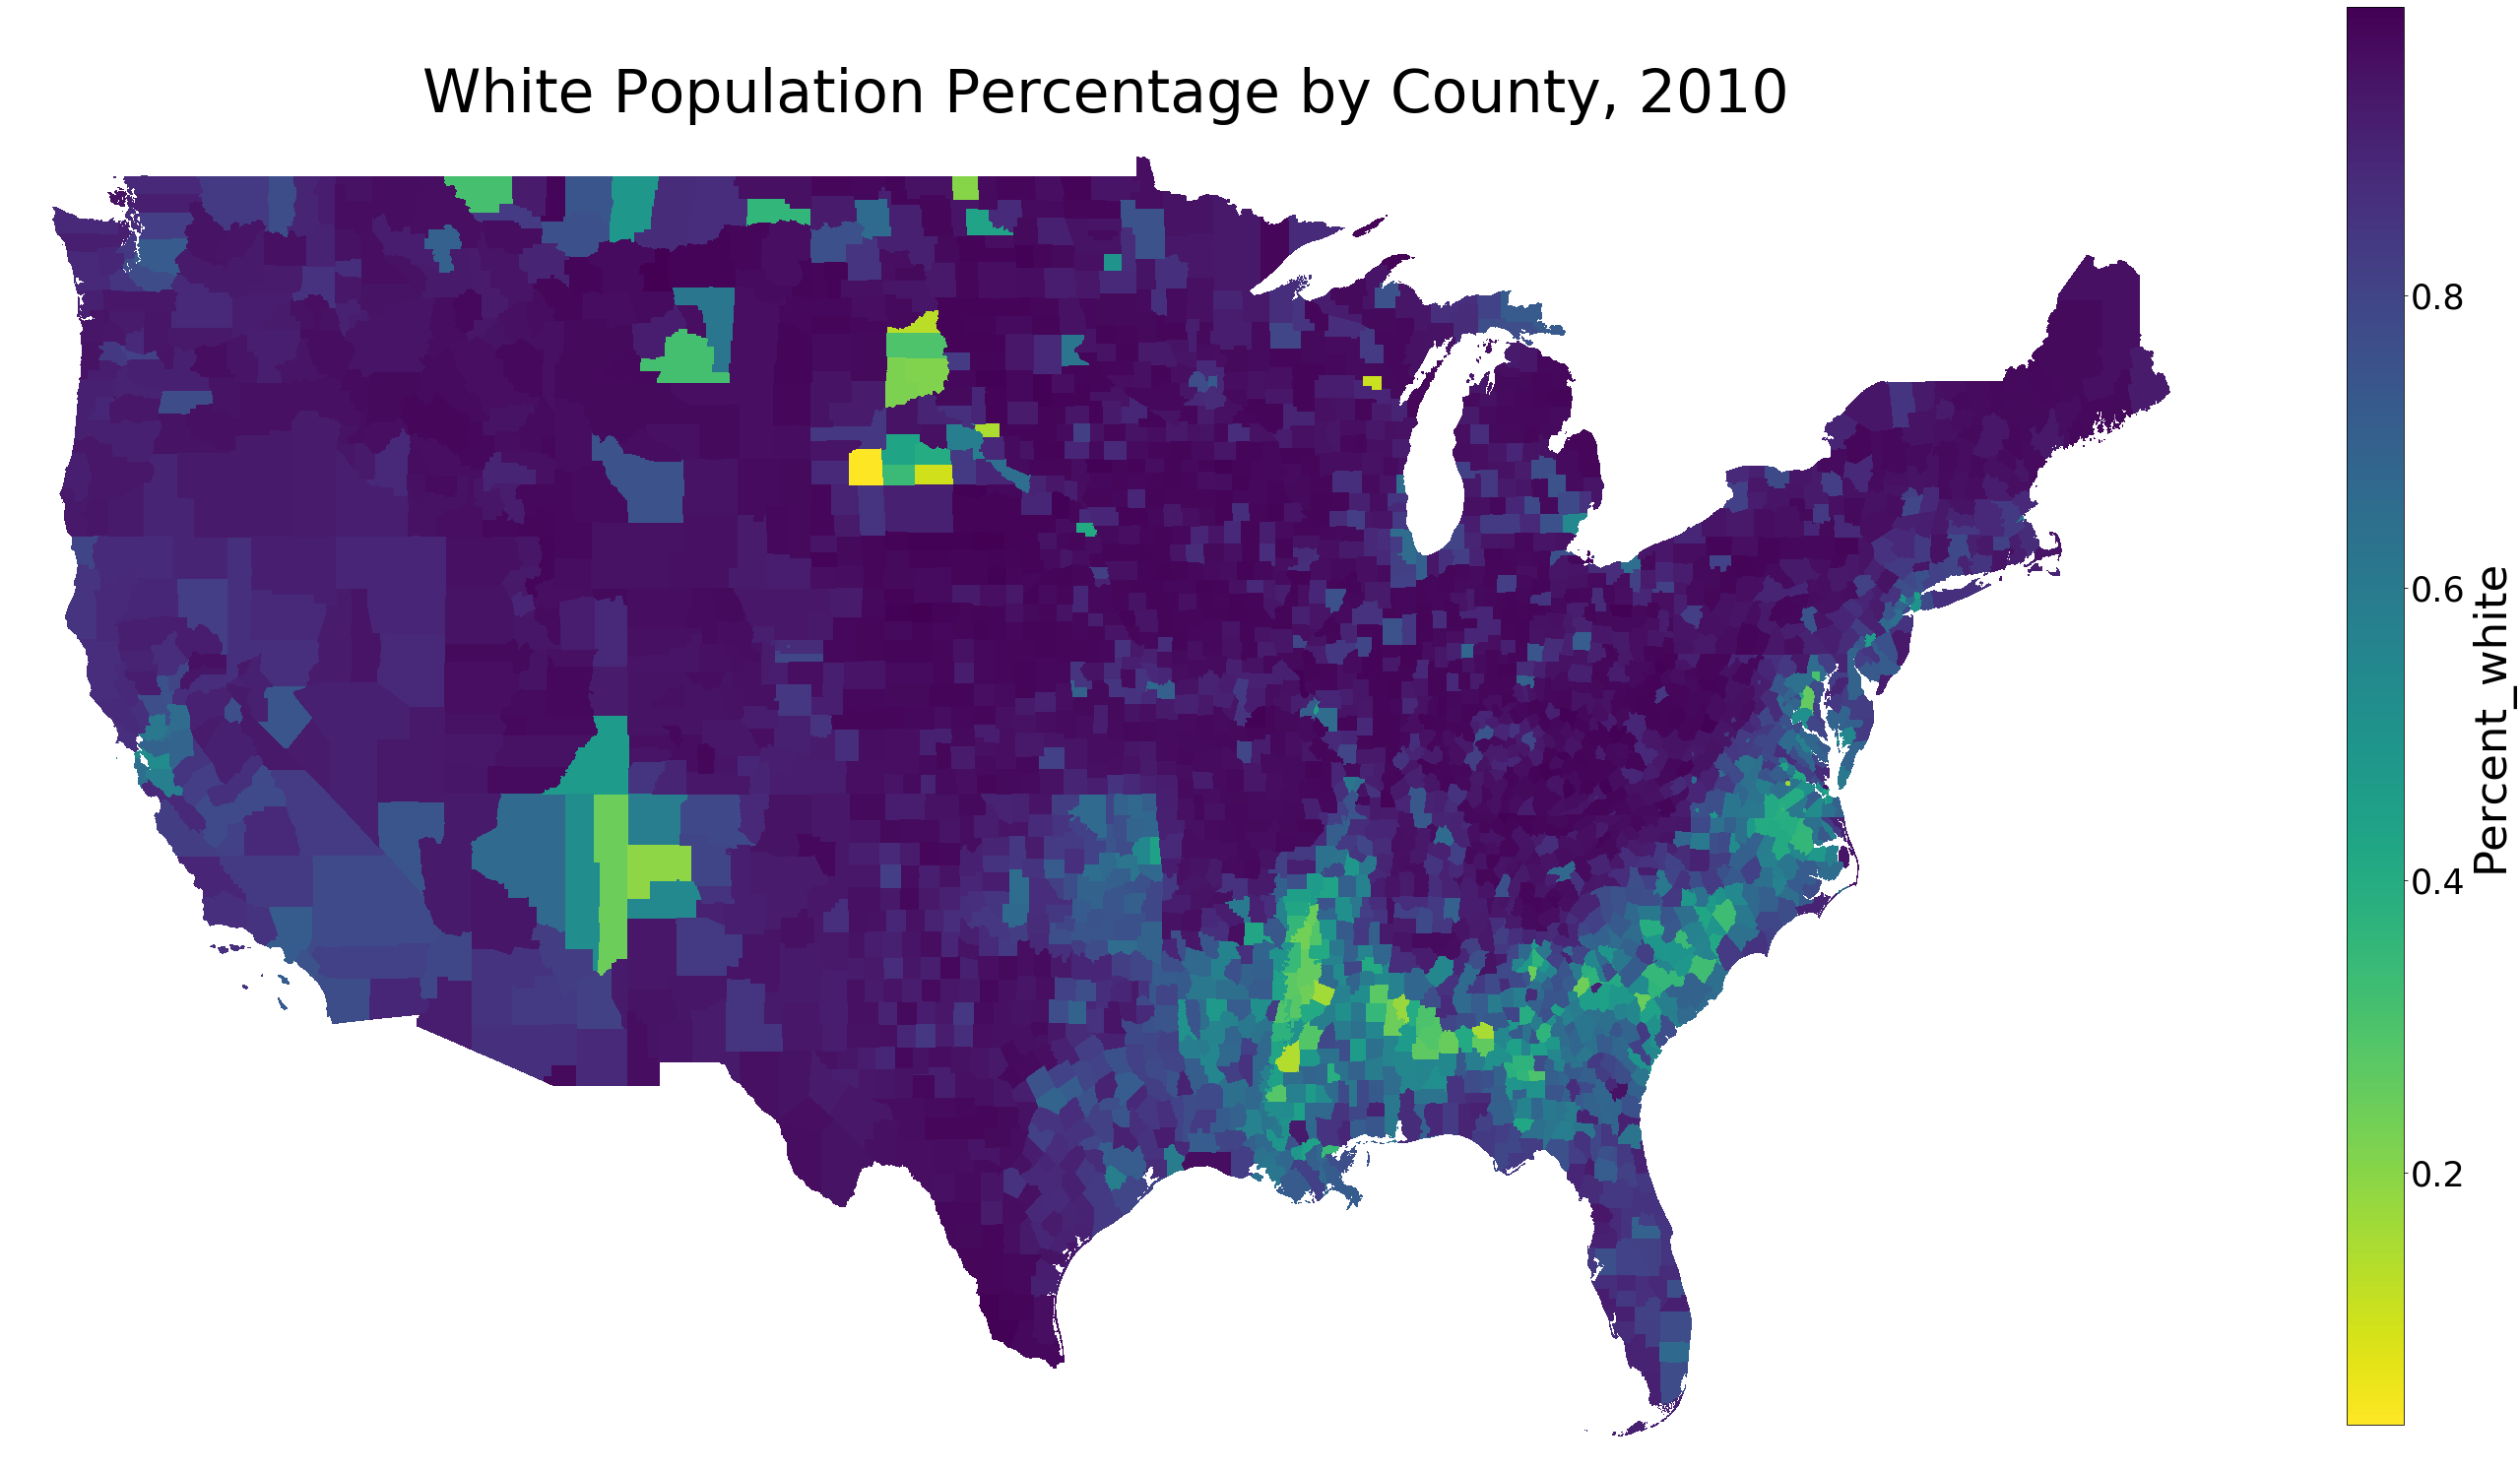

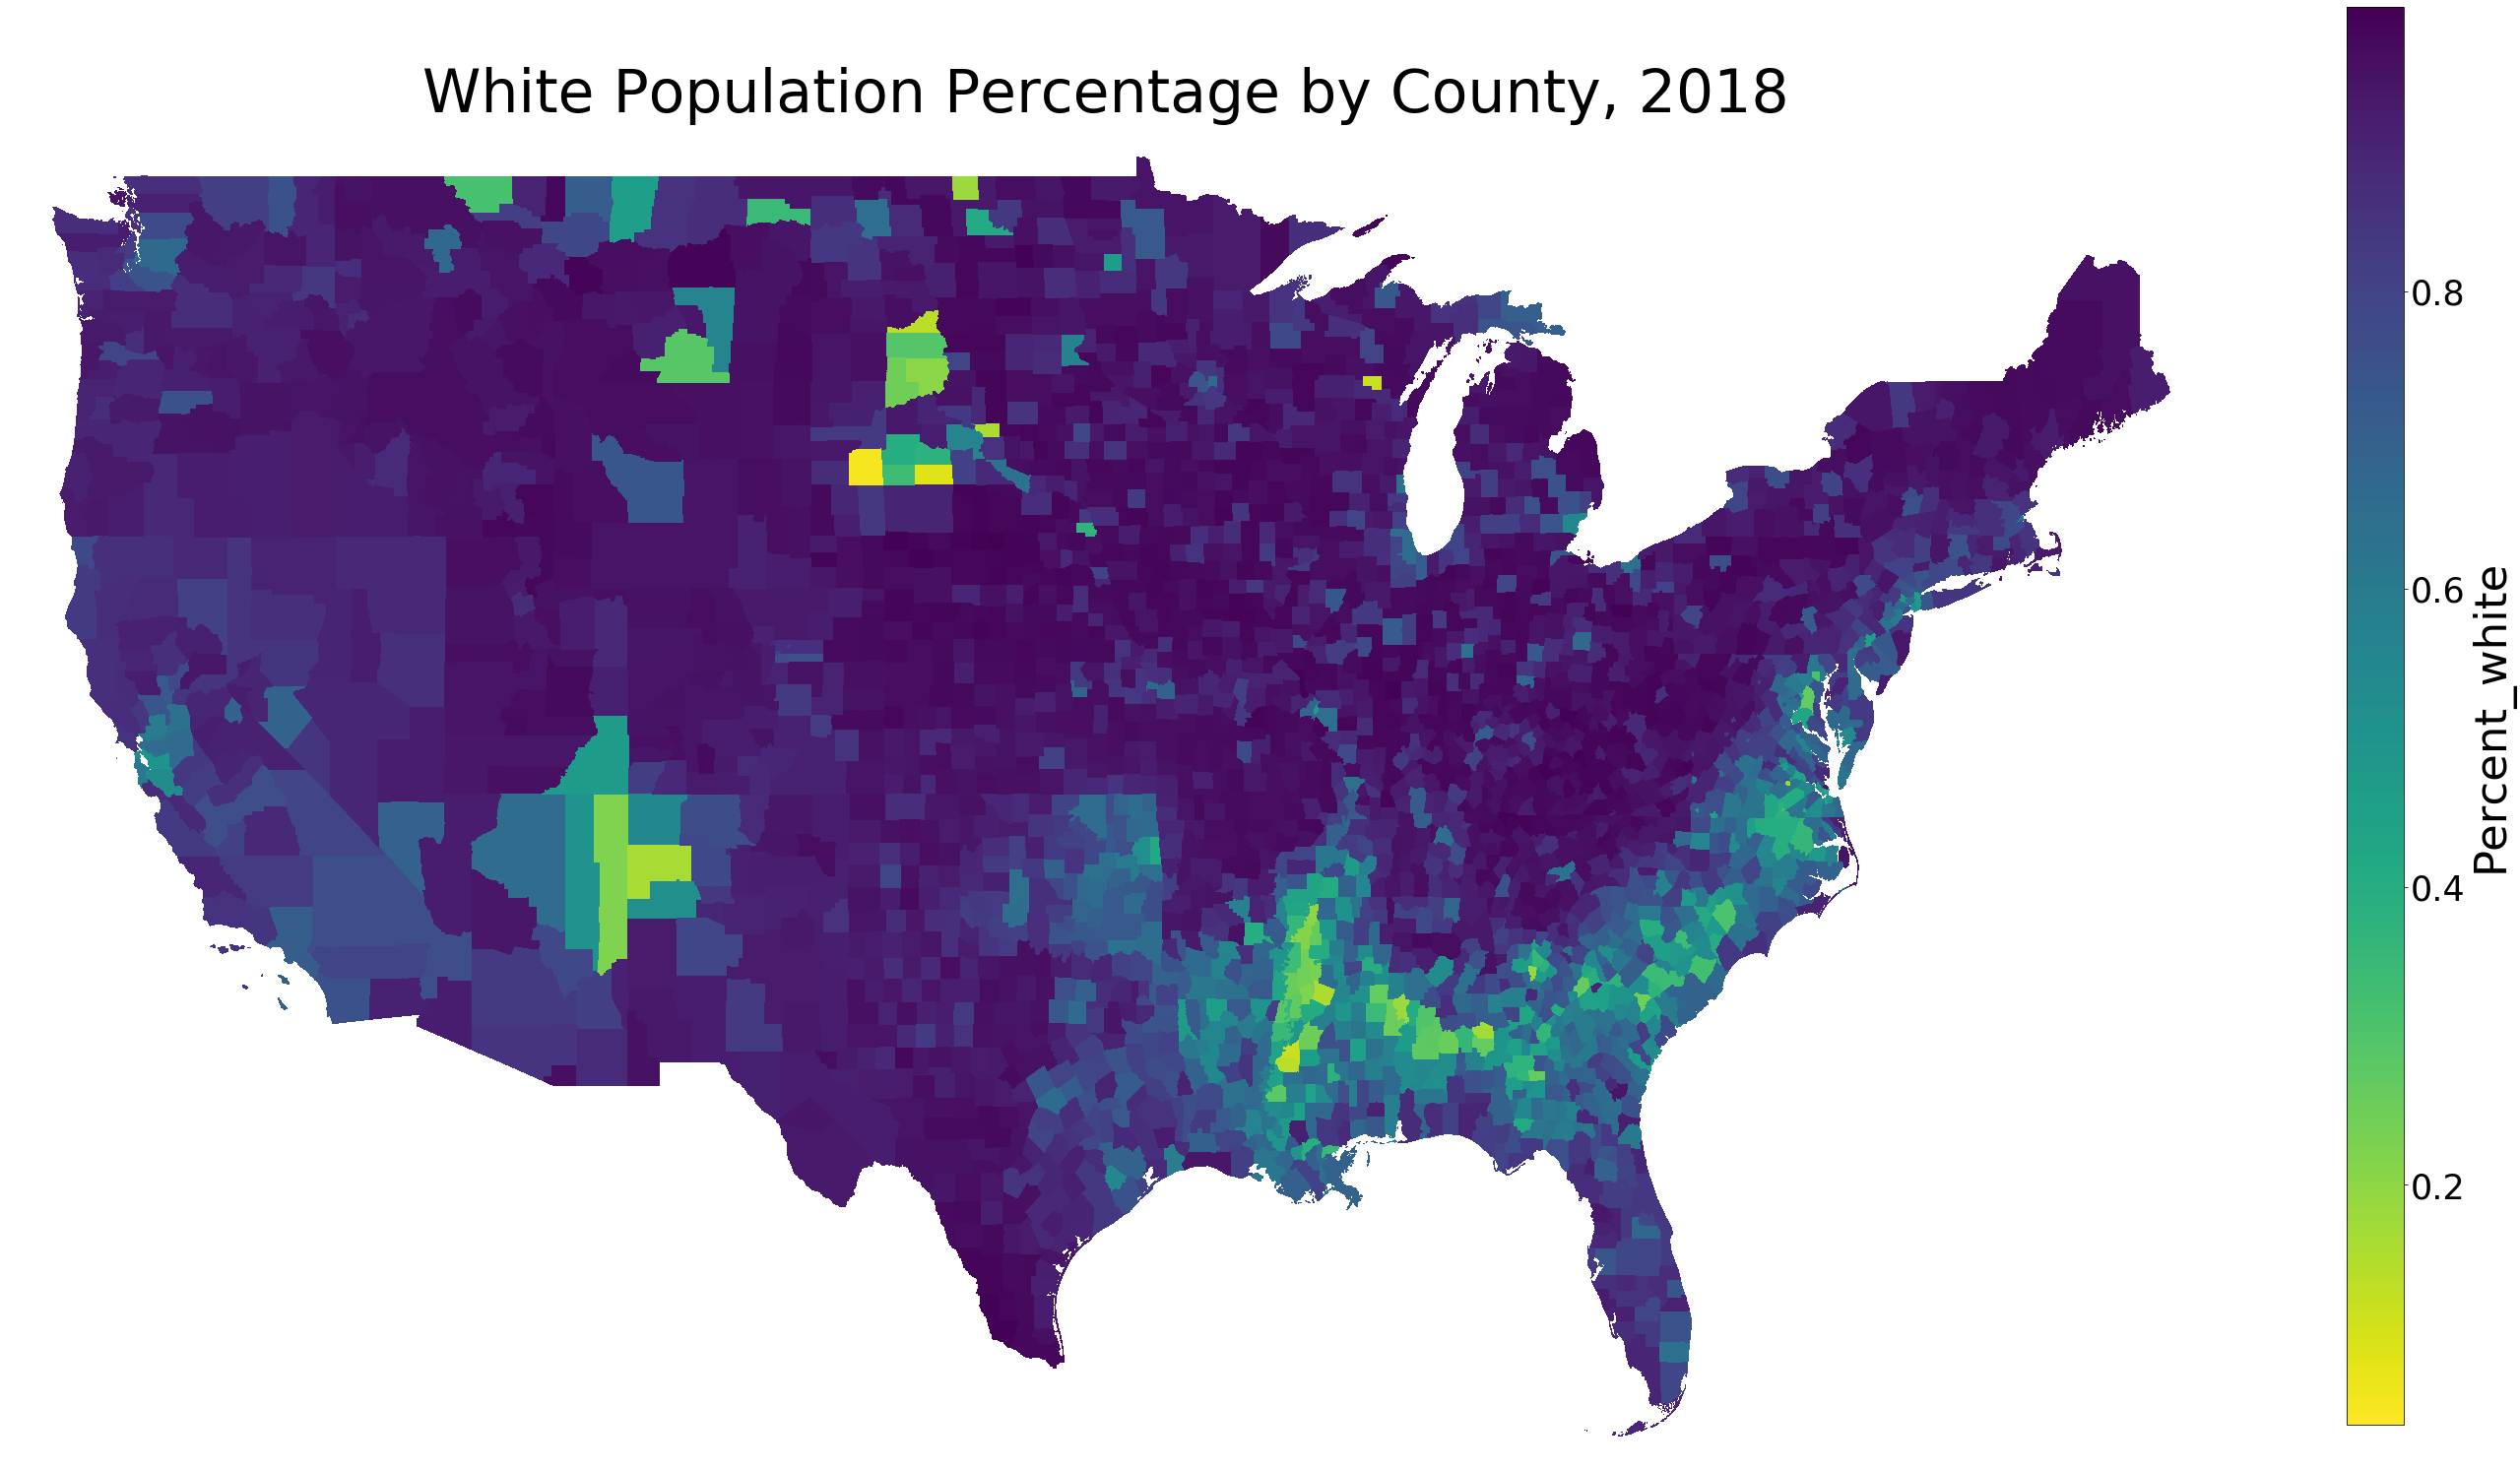

In [107]:
choropleth(df, 'Percent_white', '2010', 'viridis_r', 'White Population Percentage')
choropleth(df, 'Percent_white', '2018', 'viridis_r', 'White Population Percentage')

The above maps indicate 
### Food Insecurity Rates by County, 2009 and 2018


In [120]:
# food insecurity rates in predominently white counties


0.14147558596680776

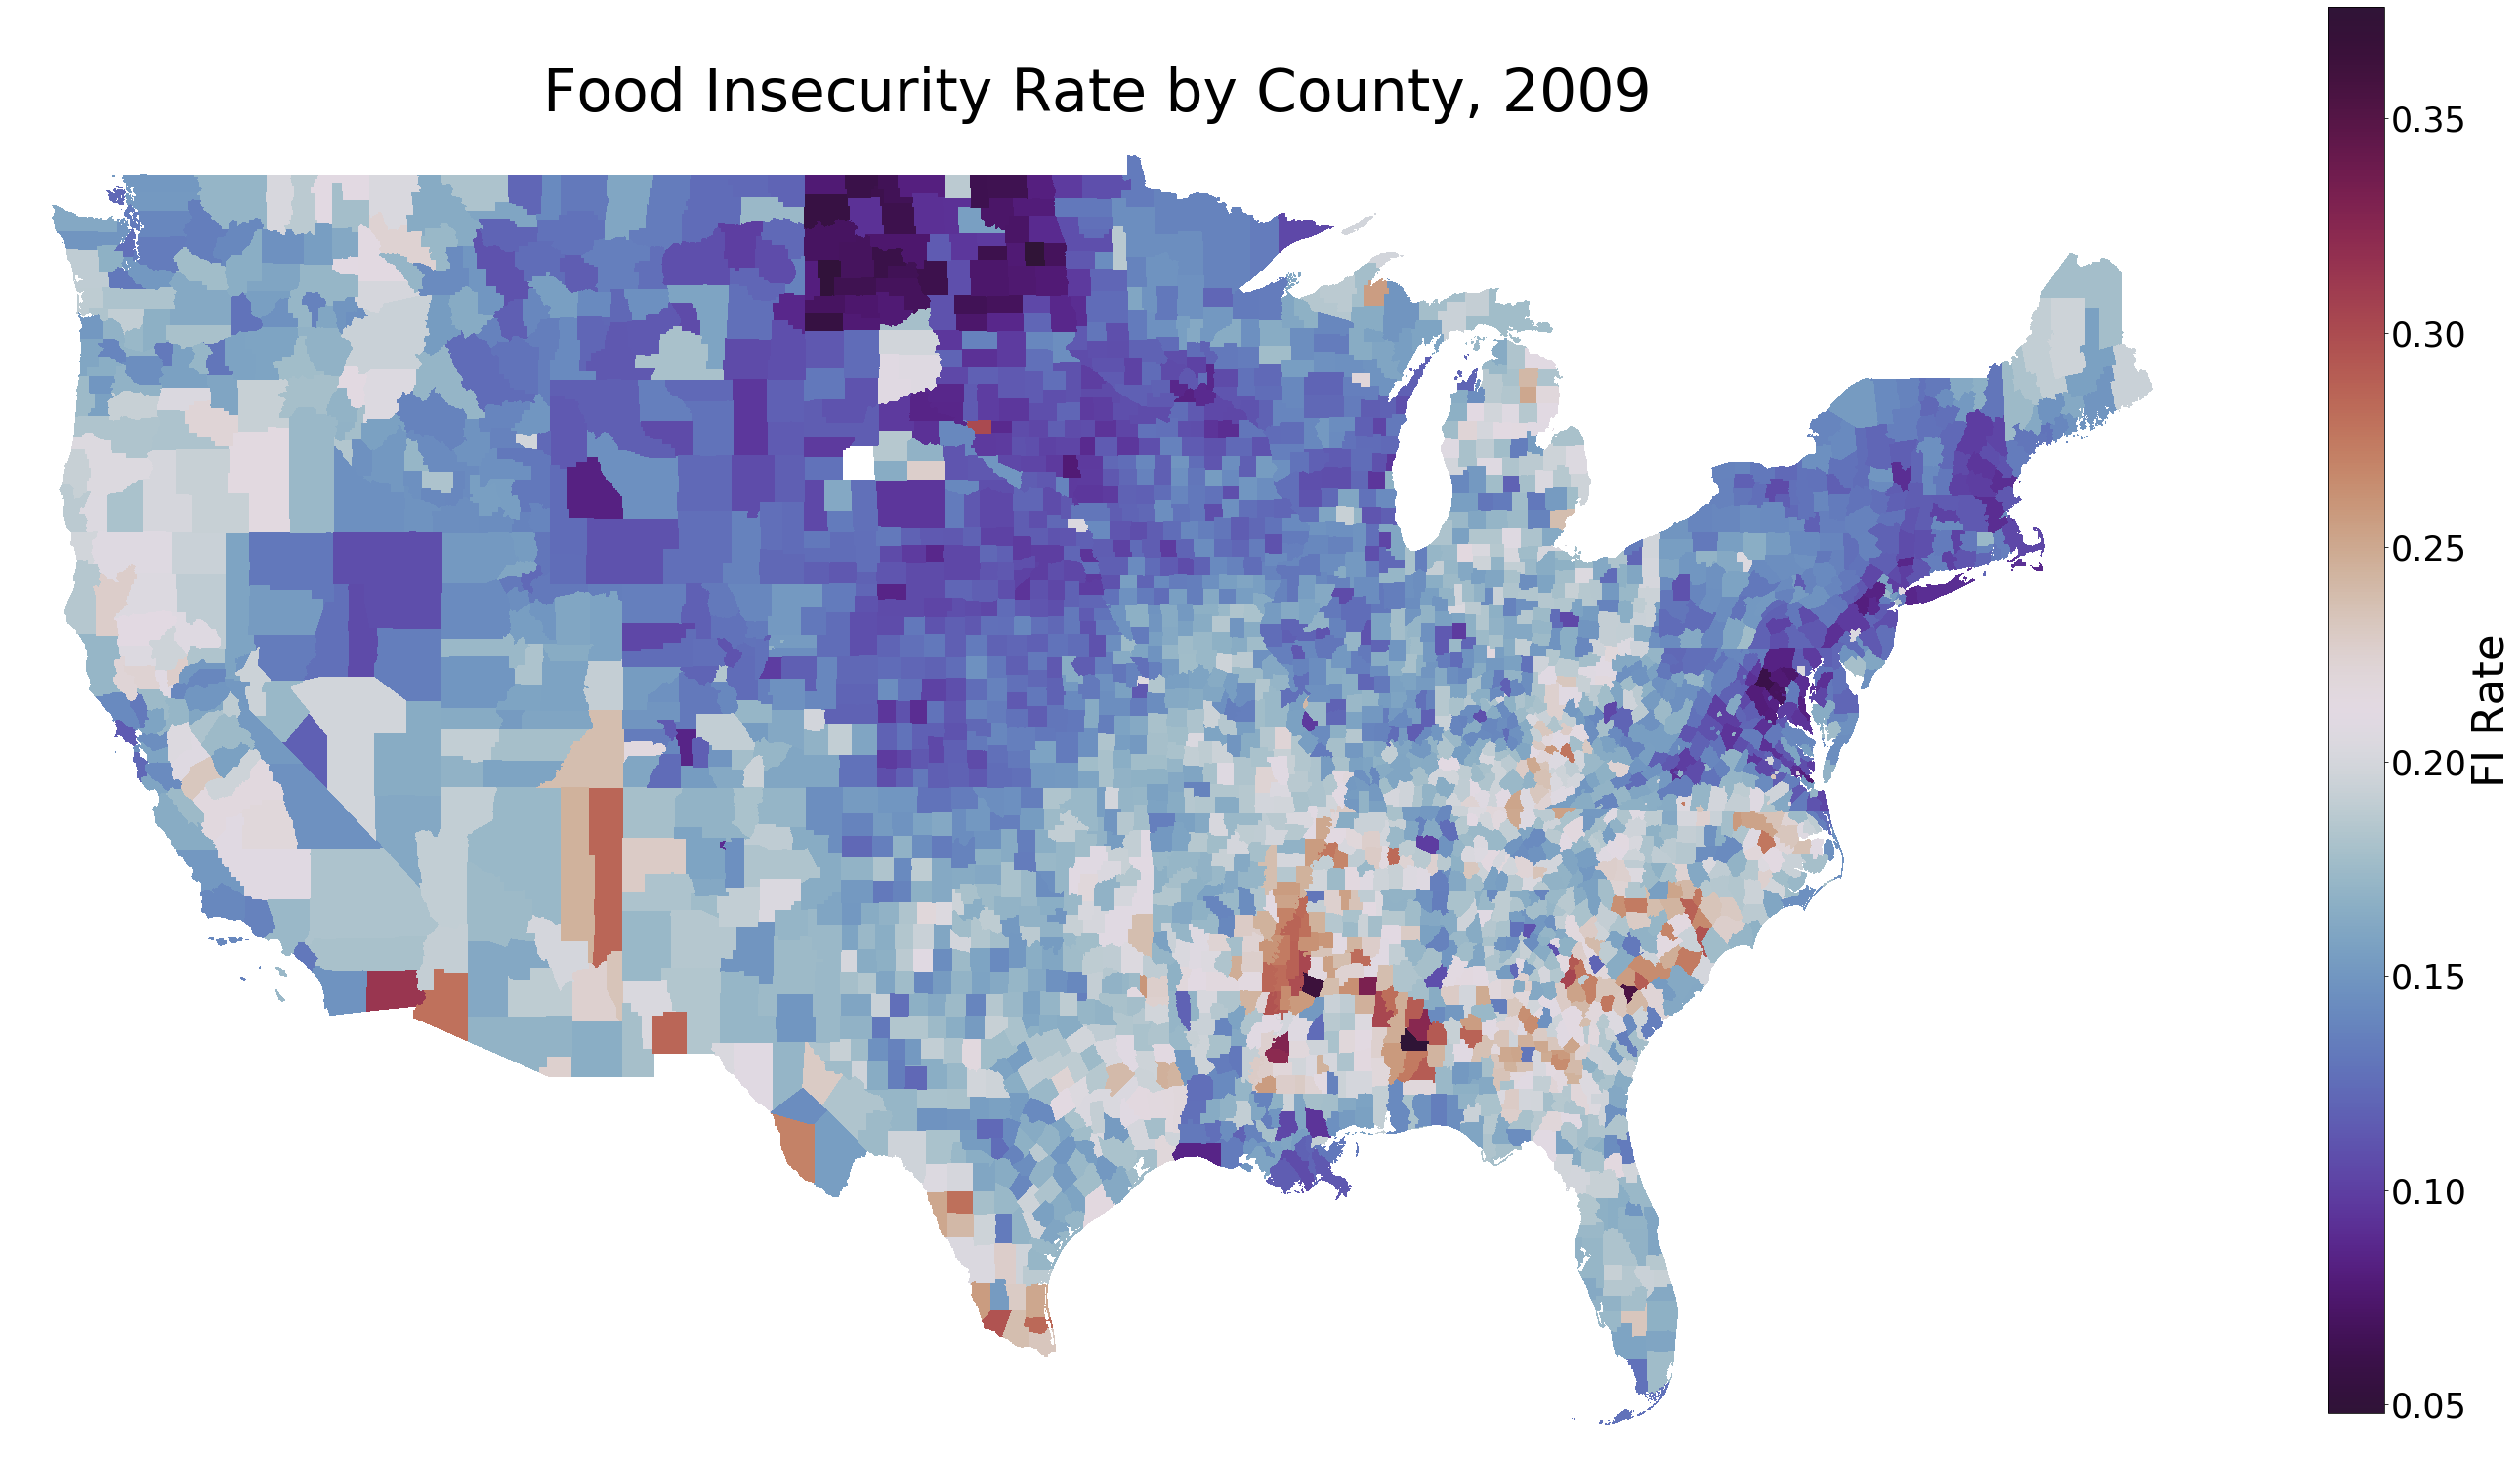

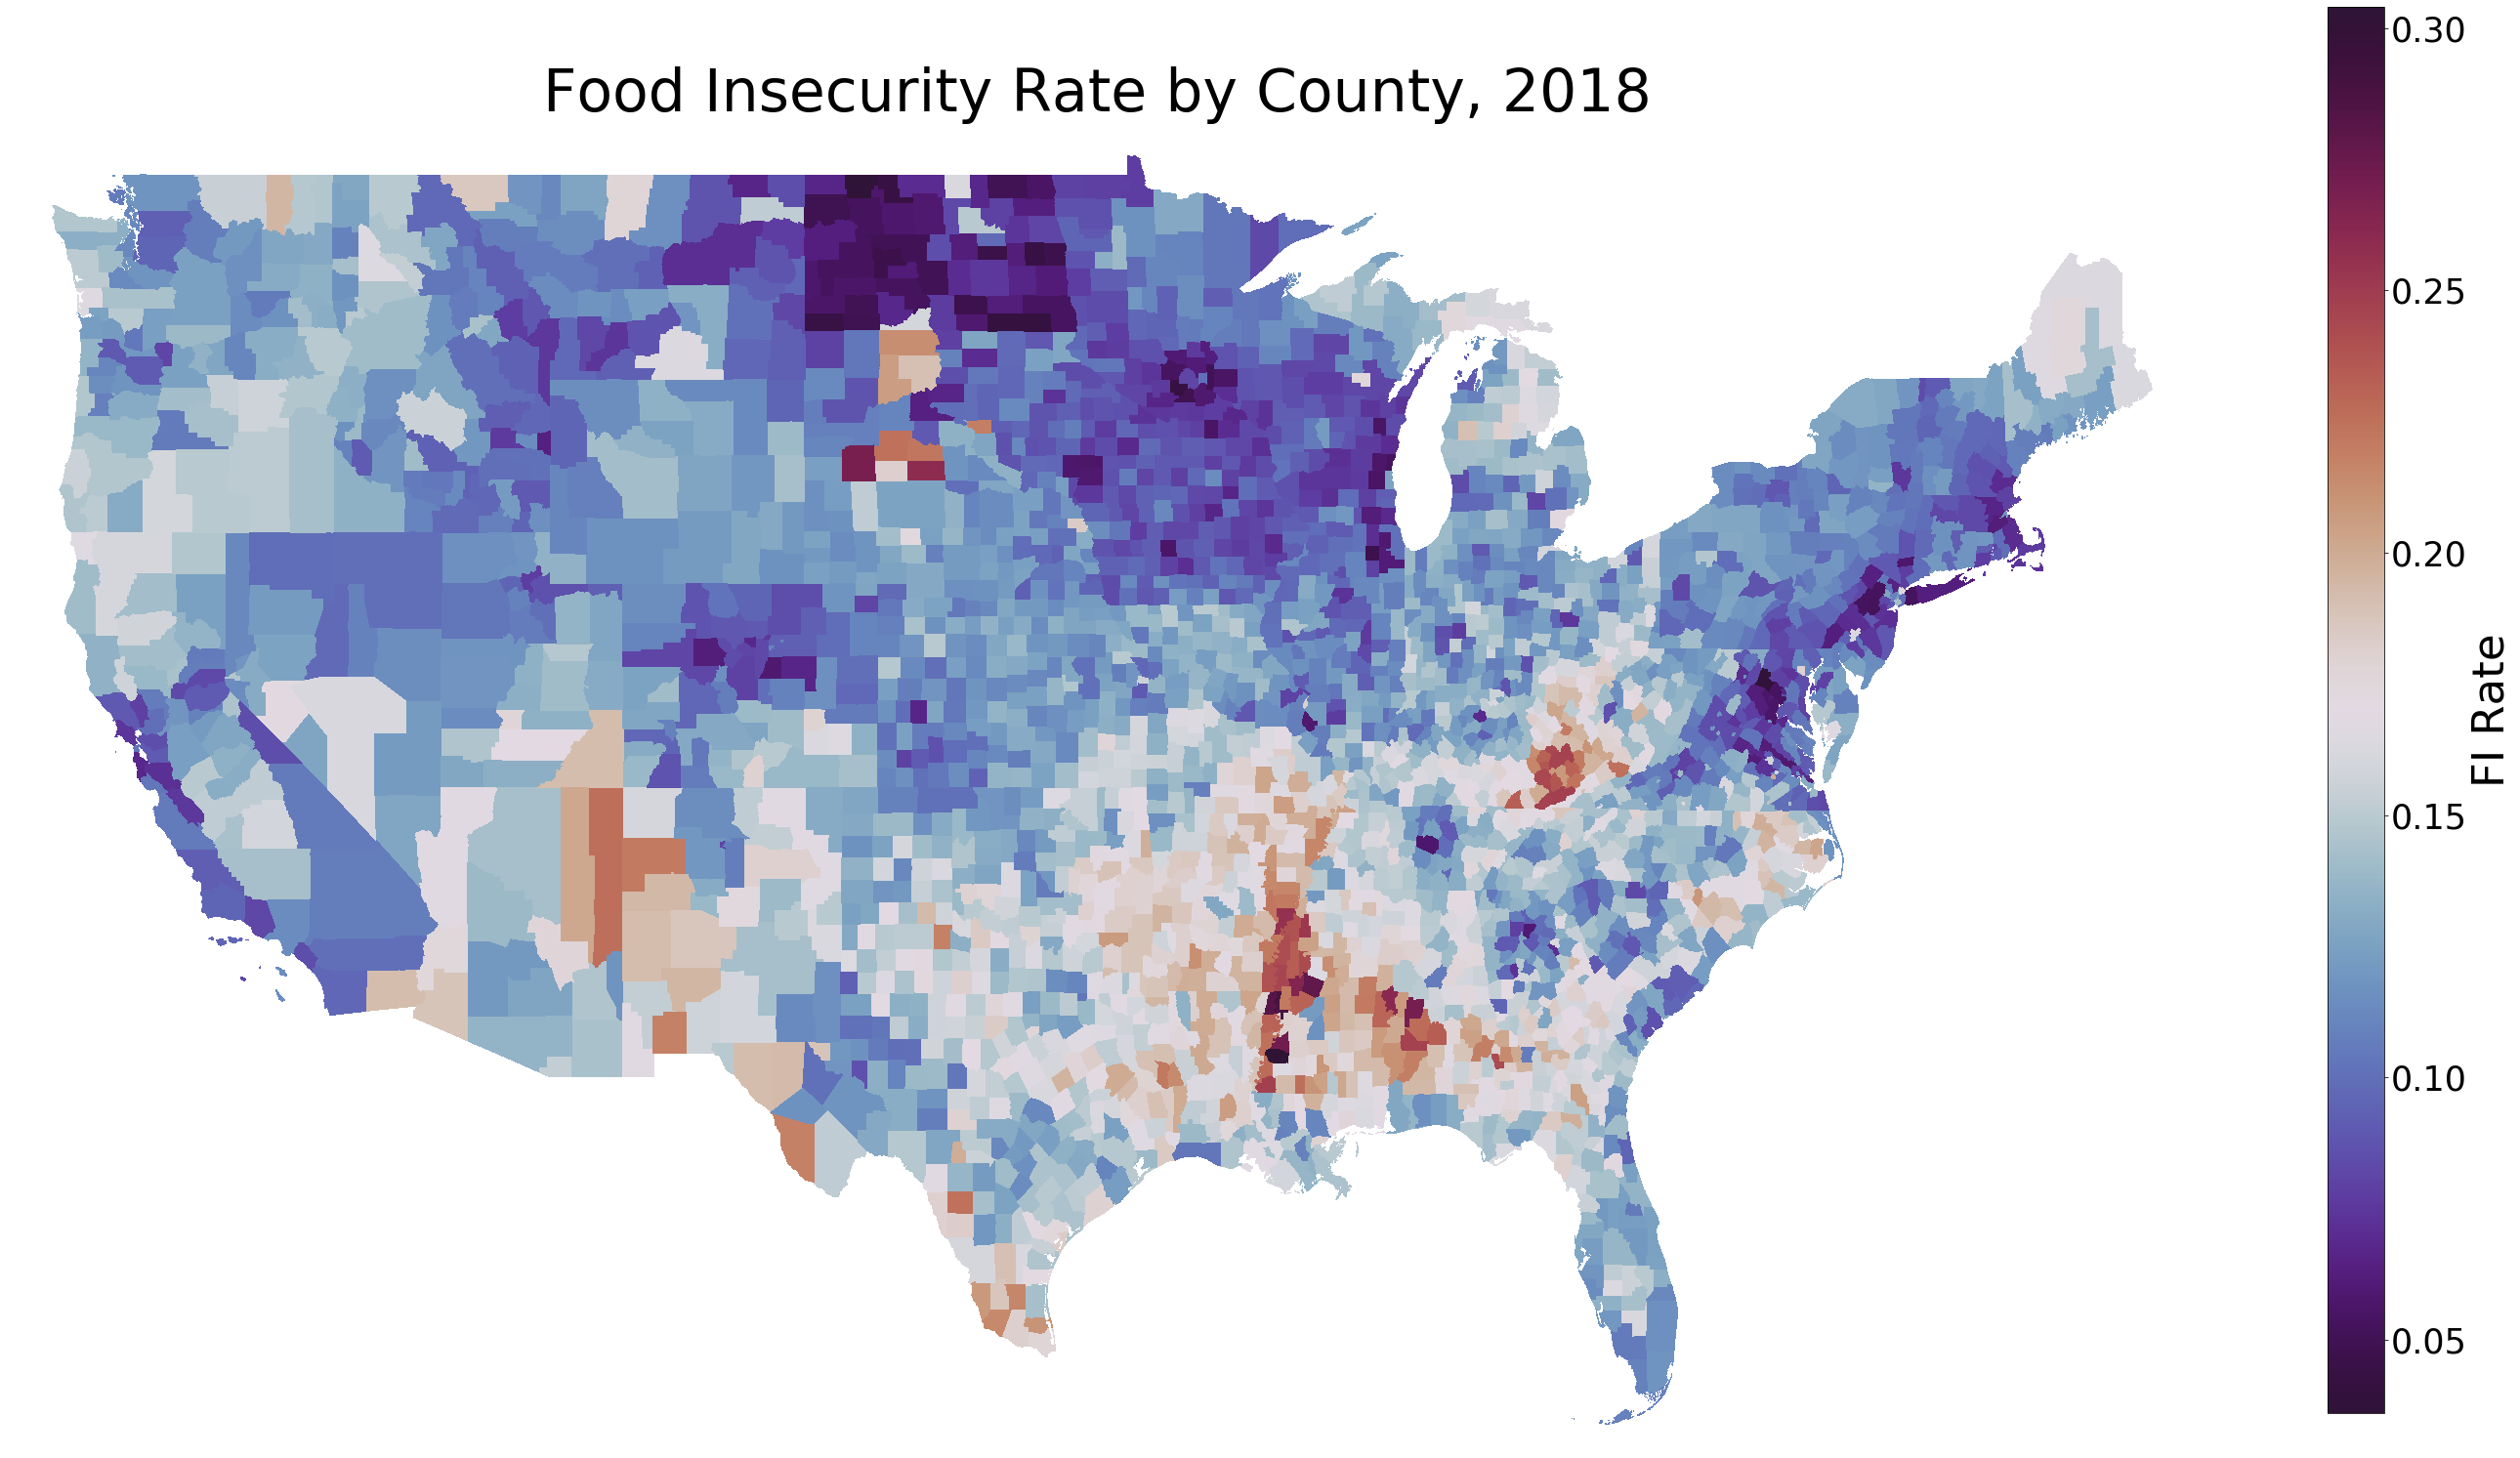

In [108]:
choropleth(df, 'FI Rate', '2009', 'twilight_shifted', 'Food Insecurity Rate')
choropleth(df, 'FI Rate', '2018', 'twilight_shifted', 'Food Insecurity Rate')

In [96]:
def choropleth(df, feature, year, cmap, title=None):
    '''sdf '''
    
    map_df = df[df.Year == year]
    # Read shapefile using Geopandas
    shape_df = gpd.read_file('../datasets/shapefile/cb_2018_us_county_500k.shp')
    geo_df = shape_df.merge(map_df, left_on='GEOID', right_on='FIPS')
    
    fig, ax = plt.subplots(figsize = (40,40))
    vmin = geo_df[feature].min()
    vmax = geo_df[feature].max()
    geo_df.plot(ax=ax, column =feature, cmap=cmap, legend = False,antialiased=False)
    if title:
        ax.set_title(title+" by County, "+year, fontdict={'fontsize': 60}, loc='center')
    else:
        ax.set_title(feature+", "+year, fontdict={'fontsize': 60}, loc='center')
    ax.set(xlim=(-126, -66), ylim=(24, 50));
    plt.xticks([], [])
    plt.yticks([], [])
    cax = fig.add_axes([.95, 0.28, 0.02, 0.5])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbr = fig.colorbar(sm, cax=cax)
    cbr.set_label(feature, size=45)
    cbr.ax.tick_params(labelsize=35) 
    ax.set_axis_off()
    # ax.annotate("__Optional Annotation__", xy=(0.25, .1), size=20, xycoords='figure fraction')
    # plt.savefig('population.png',format = 'png',bbox_inches='tight')

# Question 3: How does food insecurity rate relate to each of the other features?

In [228]:
df.sample(2)

,FIPS,Rent,Year,coc_number,Houseless_rate,Sheltered_rate,Unsheltered_rate,State,County,TOT_POP,TOT_MALE,TOT_FEMALE,TOT_WHITE,TOT_BLACK,TOT_NATIVE,TOT_ASIAN,TOT_PACIFIC,TOT_LATINX,State/County,FI Rate,Low Threshold Type,High Threshold Type,Cost Per Meal,Num_wholesale,Num_restaraunts,Num_grocery,Total_workforce,Employed,Unemployed,Unemployment_rate,Percent_male,Percent_female,Percent_white,Percent_Black,Percent_native,Percent_asian,Percent_pacific,Percent_latinX,Percent_working,Total_food_retail,Food_retail_per_person,Rent^2,Houseless_rate^2,Sheltered_rate^2,Unsheltered_rate^2,TOT_POP^2,Cost Per Meal^2,Num_wholesale^2,Num_restaraunts^2,Num_grocery^2,Unemployment_rate^2,Percent_male^2,Percent_female^2,Percent_white^2,Percent_Black^2,Percent_native^2,Percent_asian^2,Percent_pacific^2,Percent_working^2,Total_food_retail^2,Food_retail_per_person^2
674664,39123,NaN,2018,OH-507,0.000505,0.000403,0.000102,Ohio,Ottawa County,40769.0,20231.0,20538.0,39555.0,386.0,108.0,141.0,18.0,2111.0,"Ottawa County, OH",0.128,SNAP,Other Nutrition Program,3.18000,12.0,492.0,85.0,21096.0,19773.0,1323.0,6.3,0.496235,0.503765,0.970222,0.009468,0.002649,0.003459,0.000442,0.05178,0.517452,589.0,0.014447,NaN,2.546562e-07,1.621487e-07,1.039539e-08,1.662111e+09,10.112400,144.0,242064.0,7225.0,39.69,0.246249,0.253779,0.941332,0.00009,0.000007,0.000012,1.949328e-07,0.267757,346921.0,0.000209
916687,05127,NaN,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Scott County, AR",0.184,SNAP,other nutrition pgm,2.58572,NaN,NaN,NaN,4913.0,4577.0,336.0,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.685948,NaN,NaN,NaN,46.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


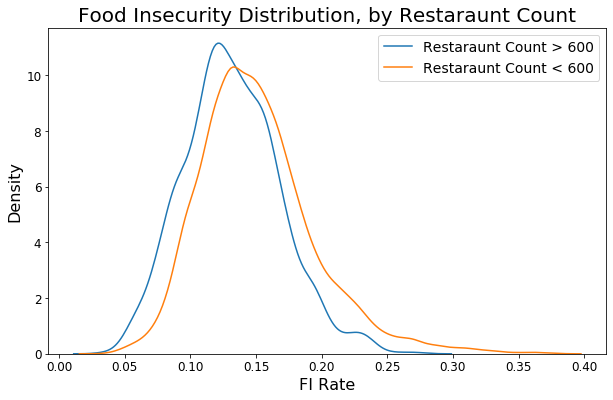

In [244]:
plt.figure(figsize=(10, 6));
ax = sns.distplot(df['FI Rate'][df['Num_restaraunts'] >df['Num_restaraunts'].mean()], label= 'Restaraunt Count > 600', hist=False);
ax = sns.distplot(df['FI Rate'][df['Num_restaraunts'] < df['Num_restaraunts'].mean()], label= 'Restaraunt Count < 600', hist=False);
ax.legend(prop=dict(size=14));
ax.set_title('Food Insecurity Distribution, by Restaraunt Count', fontsize=20);
ax.set_ylabel('Density', fontsize=16);
ax.set_xlabel('FI Rate', fontsize=16);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

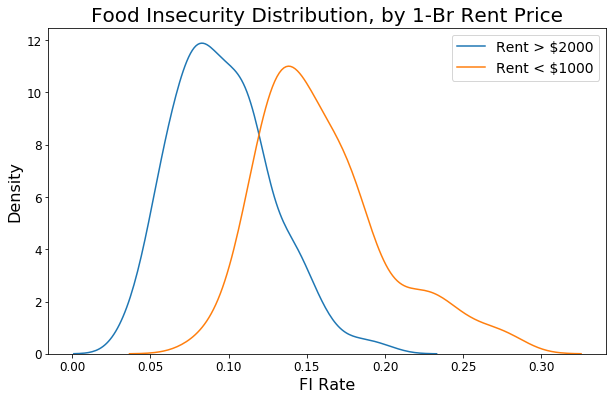

In [265]:
plt.figure(figsize=(10, 6));
ax = sns.distplot(df['FI Rate'][df['Rent'] >2000], label= 'Rent > $2000', hist=False);
ax = sns.distplot(df['FI Rate'][df['Rent'] < 1000], label= 'Rent < $1000', hist=False);
ax.legend(prop=dict(size=14));
ax.set_title('Food Insecurity Distribution, by 1-Br Rent Price', fontsize=20);
ax.set_ylabel('Density', fontsize=16);
ax.set_xlabel('FI Rate', fontsize=16);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

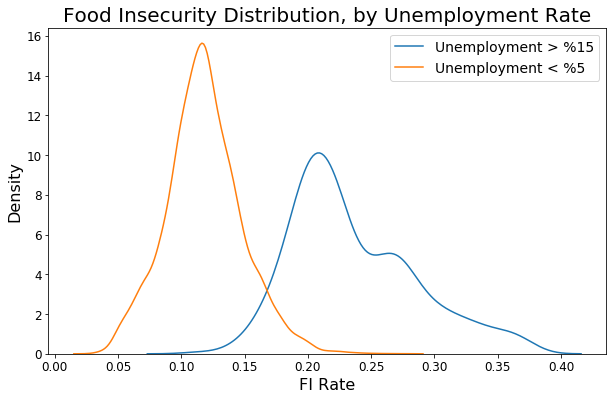

In [250]:
plt.figure(figsize=(10, 6));
ax = sns.distplot(df['FI Rate'][df['Unemployment_rate'] >15], label= 'Unemployment > %15', hist=False);
ax = sns.distplot(df['FI Rate'][df['Unemployment_rate'] < 5], label= 'Unemployment < %5', hist=False);
ax.legend(prop=dict(size=14));
ax.set_title('Food Insecurity Distribution, by Unemployment Rate', fontsize=20);
ax.set_ylabel('Density', fontsize=16);
ax.set_xlabel('FI Rate', fontsize=16);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

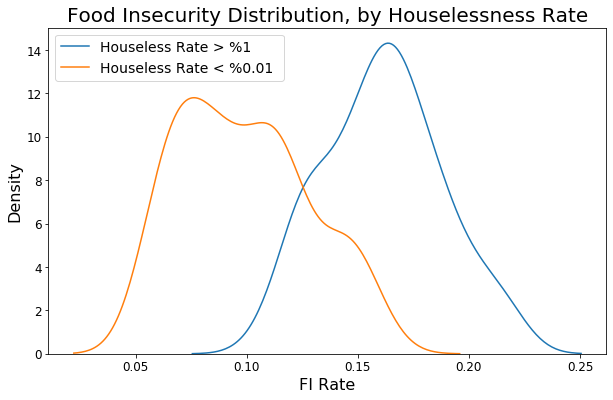

In [222]:
plt.figure(figsize=(10, 6));
ax = sns.distplot(df['FI Rate'][df['Houseless_rate'] >.01], label= 'Houseless Rate > %1', hist=False);
ax = sns.distplot(df['FI Rate'][df['Houseless_rate'] < .0001], label= 'Houseless Rate < %0.01 ', hist=False);
ax.legend(prop=dict(size=14));
ax.set_title('Food Insecurity Distribution, by Houselessness Rate', fontsize=20);
ax.set_ylabel('Density', fontsize=16);
ax.set_xlabel('FI Rate', fontsize=16);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

### Food Insecurity Rate, by Race

In [122]:
# Predominently communities of color
df['FI Rate'][df['Percent_white']<.5].mean()

0.2251573112521035

In [123]:
# Predominently white communities
df['FI Rate'][df['Percent_white']>.5].mean()

0.14147558596680776

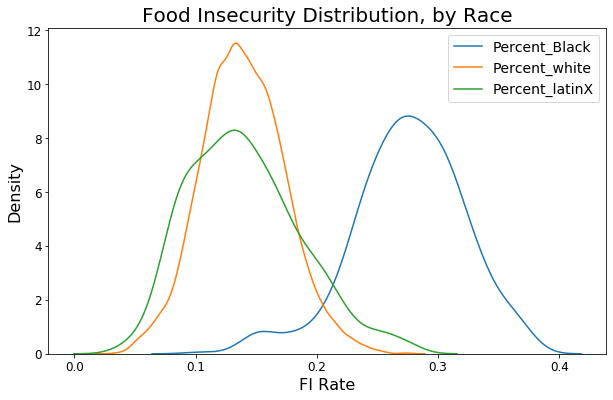

In [198]:
plt.figure(figsize=(10, 6));
for feat in ['Percent_Black', 'Percent_white', 'Percent_latinX']:
    ax = sns.distplot(df['FI Rate'][df[feat] > .6], label= feat, hist=False);
ax.legend(prop=dict(size=14));
ax.set_title('Food Insecurity Distribution, by Race', fontsize=20);
ax.set_ylabel('Density', fontsize=16);
ax.set_xlabel('FI Rate', fontsize=16);

plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

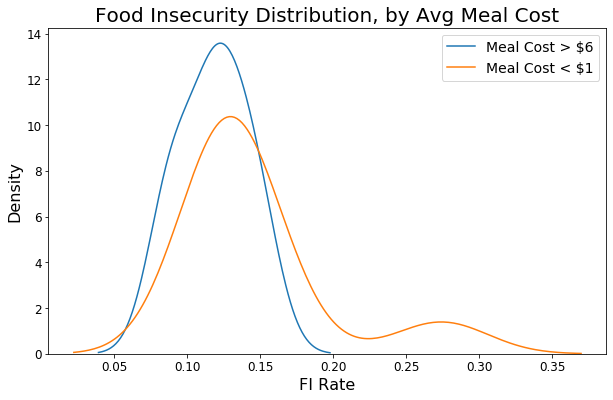

In [263]:
plt.figure(figsize=(10, 6));
ax = sns.distplot(df['FI Rate'][df['Cost Per Meal'] > 6], label= 'Meal Cost > $6', hist=False);
ax = sns.distplot(df['FI Rate'][df['Cost Per Meal'] < 1], label= 'Meal Cost < $1', hist=False);
ax.legend(prop=dict(size=14));
ax.set_title('Food Insecurity Distribution, by Avg Meal Cost', fontsize=20);
ax.set_ylabel('Density', fontsize=16);
ax.set_xlabel('FI Rate', fontsize=16);

plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

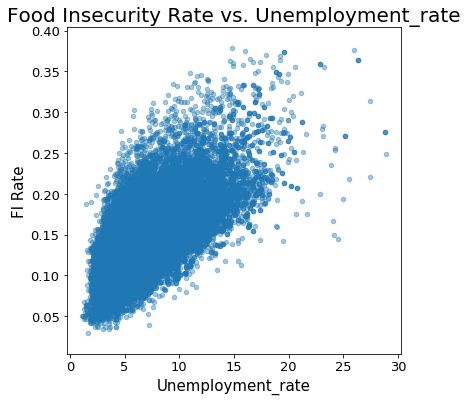

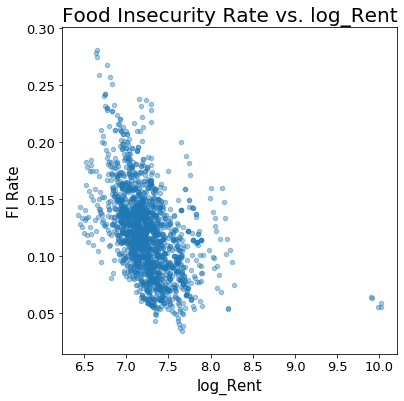

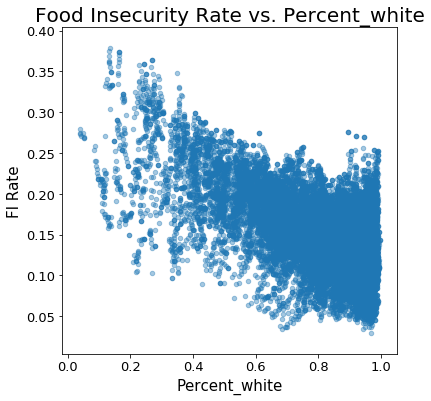

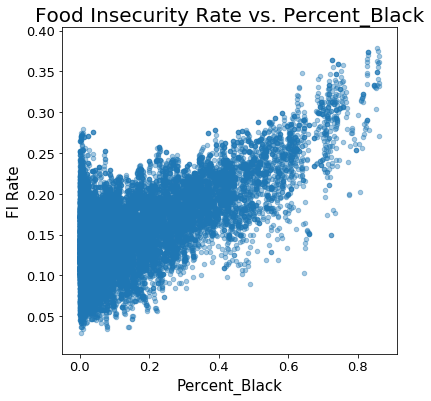

In [32]:

features = [ 'Unemployment_rate','log_Rent', 'Percent_white','Percent_Black']
for feat in features:
    ax = df.plot(kind='scatter', x=feat, y='FI Rate',  alpha=0.4,figsize=(6, 6));
    plt.xticks(fontsize=13);
    plt.yticks(fontsize=13);
    ax.set_title('Food Insecurity Rate vs. '+feat, fontsize=20);
    ax.set_ylabel('FI Rate', fontsize=15);
    ax.set_xlabel(feat, fontsize=15);
    